* * * * * * * * * * *
Master notebook to run every step of the analyses of the Z0 experiment in python.

Author: Rodrigo Guedes Lang (rodrigo.lang@fau.de)

Date: March 2024

Based on scripts by Kathrin Valerius and Jannik Hofestaedt from 2011-2013
* * * * * * * * * * *

In [111]:
from glob import glob
from natsort import natsorted
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy as sp

In [108]:
from PIL import Image
from IPython.display import display

import ipywidgets as widgets
from ipywidgets import interact

import random
import pylab

In [5]:
def browse_images(channel):
    images = natsorted(glob(f'../Data/GROPEScreenshots/{channel}/*.png'))
    def view_image(i):
        display(Image.open(images[i]))
    interact(view_image, i=(0,len(images)-1))

def pick_images():
    n = random.sample(range(0,40), k=40)
    images = natsorted(glob(f'../Data/GROPEScreenshots/test/*.png'))
    def view_image(i):
        display(Image.open(images[i]))
    interact(view_image, i=n)
    print(n)

# Part 1 - Qualitative analysis of events

In this part of the experiment, the main idea is to look at a small subset of Monte Carlo (MC) events to build up insight on how events from each channel look like on average. The final good is to come up with some crude cuts to separate the channels.

## Part 1.1 - GROPE event display

### Exercises

- 1.1. For each channel, describe qualitatively the features of its events.

- 1.2. Come up with a 4x4 table describing which variables are important for separating each pair of channels

In [6]:
browse_images("tt")

interactive(children=(IntSlider(value=9, description='i', max=19), Output()), _dom_classes=('widget-interact',…

- 1.3. Now, for 10 randomly selected images, just by looking at the GROPE image, try to evaluate what channel each event originates from (ee, mm, tt or qq).

In [7]:
pick_images()

interactive(children=(Dropdown(description='i', options=(3, 14, 33, 15, 23, 34, 2, 31, 4, 21, 28, 37, 22, 36, …

[3, 14, 33, 15, 23, 34, 2, 31, 4, 21, 28, 37, 22, 36, 6, 0, 19, 18, 20, 32, 11, 29, 8, 7, 13, 16, 25, 9, 39, 12, 17, 24, 10, 38, 26, 27, 35, 1, 5, 30]


# Part 2 - Quantitative analysis of events

Looking at singular events may help understanding how they look like in the detector. Nevertheless, due to the stochastic nature of the processes involved, each event will look quite differently and we need to look at event distributions.

In the previous part, we have dealt with very few MC events to create a better insight on what their properties and differences are. In this part, we will move on to a much larger set of MC events so that more complete and well-described distributions can be analysed. From here on, information and images of single events will not be used anymore.

## Part 2.1 - Generating histograms

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

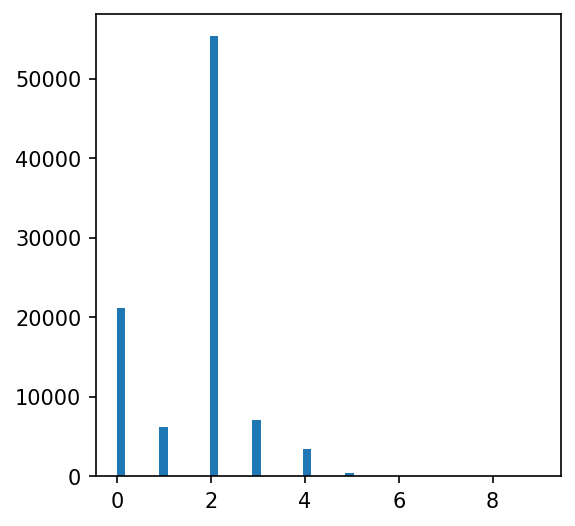

In [8]:
# Example for a single channel

file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())



plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(Ncharged,bins=50)
plt.set_xlabel("Number of charges tracks")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures


plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(Pcharged,bins=50)
plt.set_xlabel("Sum of momentum of charged tracks [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()


plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(np.log10(Pcharged+0.01),bins=50)
plt.set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()


plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(E_ecal,bins=50)
plt.set_xlabel("Energy in the electrocalorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()


plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(E_hcal,bins=50)
plt.set_xlabel("Energy in the hadronic calorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()


plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(cos_thru,bins=50)
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()


plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(cos_thet,bins=50)
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()


plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(cos_thru,bins=np.linspace(-1,1,50))
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()


plt.subplots(figsize=(4,4),dpi=150) 
plt.hist(cos_thet,bins=np.linspace(-1,1,50))
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

In [ ]:
# Example for a single channel

file = uproot.open("../Data/MC/tt.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())


plt.subplots(figsize=(4,4),dpi=150)
plt.hist(Ncharged,bins=50, color="green")
plt.set_xlabel("Number of charges tracks")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}t^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(Pcharged,bins=50, color="green")
plt.set_xlabel("Sum of momentum of charged tracks [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(np.log10(Pcharged+0.01),bins=50, color="green")
plt.set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(E_ecal,bins=50, color="green")
plt.set_xlabel("Energy in the electrocalorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(E_hcal,bins=50, color="green")
plt.set_xlabel("Energy in the hadronic calorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thru,bins=50, color="green")
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thet,bins=50, color="green")
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thru,bins=np.linspace(-1,1,50), color="green")
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thet,bins=np.linspace(-1,1,50), color="green")
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

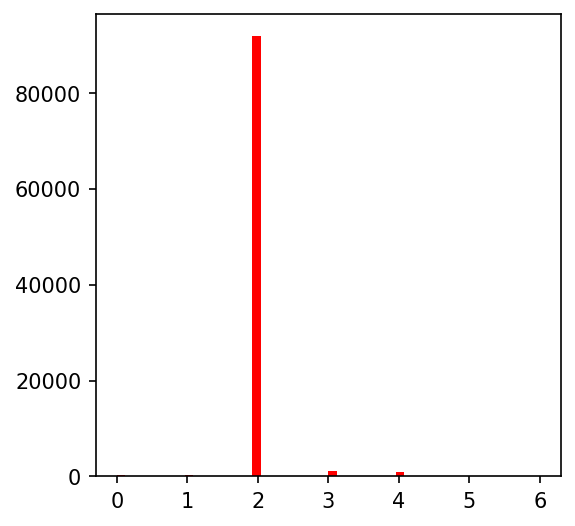

In [9]:
# Example for a single channel

file = uproot.open("../Data/MC/mm.root")
tree = file['h3']
Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())


plt.subplots(figsize=(4,4),dpi=150)
plt.hist(Ncharged,bins=50, color="red")
plt.set_xlabel("Number of charges tracks")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(Pcharged,bins=50, color="red")
plt.set_xlabel("Sum of momentum of charged tracks [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(np.log10(Pcharged+0.01),bins=50, color="red")
plt.set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(E_ecal,bins=50, color="red")
plt.set_xlabel("Energy in the electrocalorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(E_hcal,bins=50, color="red")
plt.set_xlabel("Energy in the hadronic calorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thru,bins=50, color="red")
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thet,bins=50, color="red")
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thru,bins=np.linspace(-1,1,50), color="red")
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thet,bins=np.linspace(-1,1,50), color="red")
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
plt.show()

In [10]:
# Example for a single channel

file = uproot.open("../Data/MC/qq.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(Ncharged,bins=50, color="xkcd:bluish purple")
plt.set_xlabel("Number of charges tracks")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(Pcharged,bins=50, color="xkcd:bluish purple")
plt.set_xlabel("Sum of momentum of charged tracks [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(np.log10(Pcharged+0.01),bins=50, color="xkcd:bluish purple")
plt.set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()
plt.subplots(figsize=(4,4),dpi=150)
plt.hist((Pcharged),bins=np.linspace(-1,1,50), color="xkcd:bluish purple")
plt.set_xlabel(r"$(P_{\rm{sum}} / \rm{GeV})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(E_ecal,bins=50, color="xkcd:bluish purple")
plt.set_xlabel("Energy in the electrocalorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(E_hcal,bins=50, color="xkcd:bluish purple")
plt.set_xlabel("Energy in the hadronic calorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thru,bins=50, color="xkcd:bluish purple")
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thet,bins=50, color="xkcd:bluish purple")
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thru,bins=np.linspace(-1,1,50), color="xkcd:bluish purple")
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()

plt.subplots(figsize=(4,4),dpi=150)
plt.hist(cos_thet,bins=np.linspace(-1,1,50), color="xkcd:bluish purple")
plt.set_xlabel(r"$\cos(\theta)$")]
plt.set_ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.show()

SyntaxError: unmatched ']' (3242182469.py, line 78)

### Questions

Three plots were "redefined".

1. For $P_{\rm{sum}}$, we used log10 (and had to add 0.01). Why?   -> events at 0 (or below zero) destroy the log
2. For the angles, we need to constrain to the physical values, i.e., $-1 < \cos(\theta) < 1$. What happened to the events with unphysical angles?   -> 0° and 180° cant be measured (no detector material)

### Exercises

2.1.0. Every plot in this protocol/example notebook has been plotted with the standard style options. Are these the best options in general? For each case? Do you think you can come up with better looking/easier to read plots?

2.1.1. Obtain the same histogram for the other three channels (the input root files are located in the same folder).

2.1.2. Come up with a nice way to show the comparison between the four channels

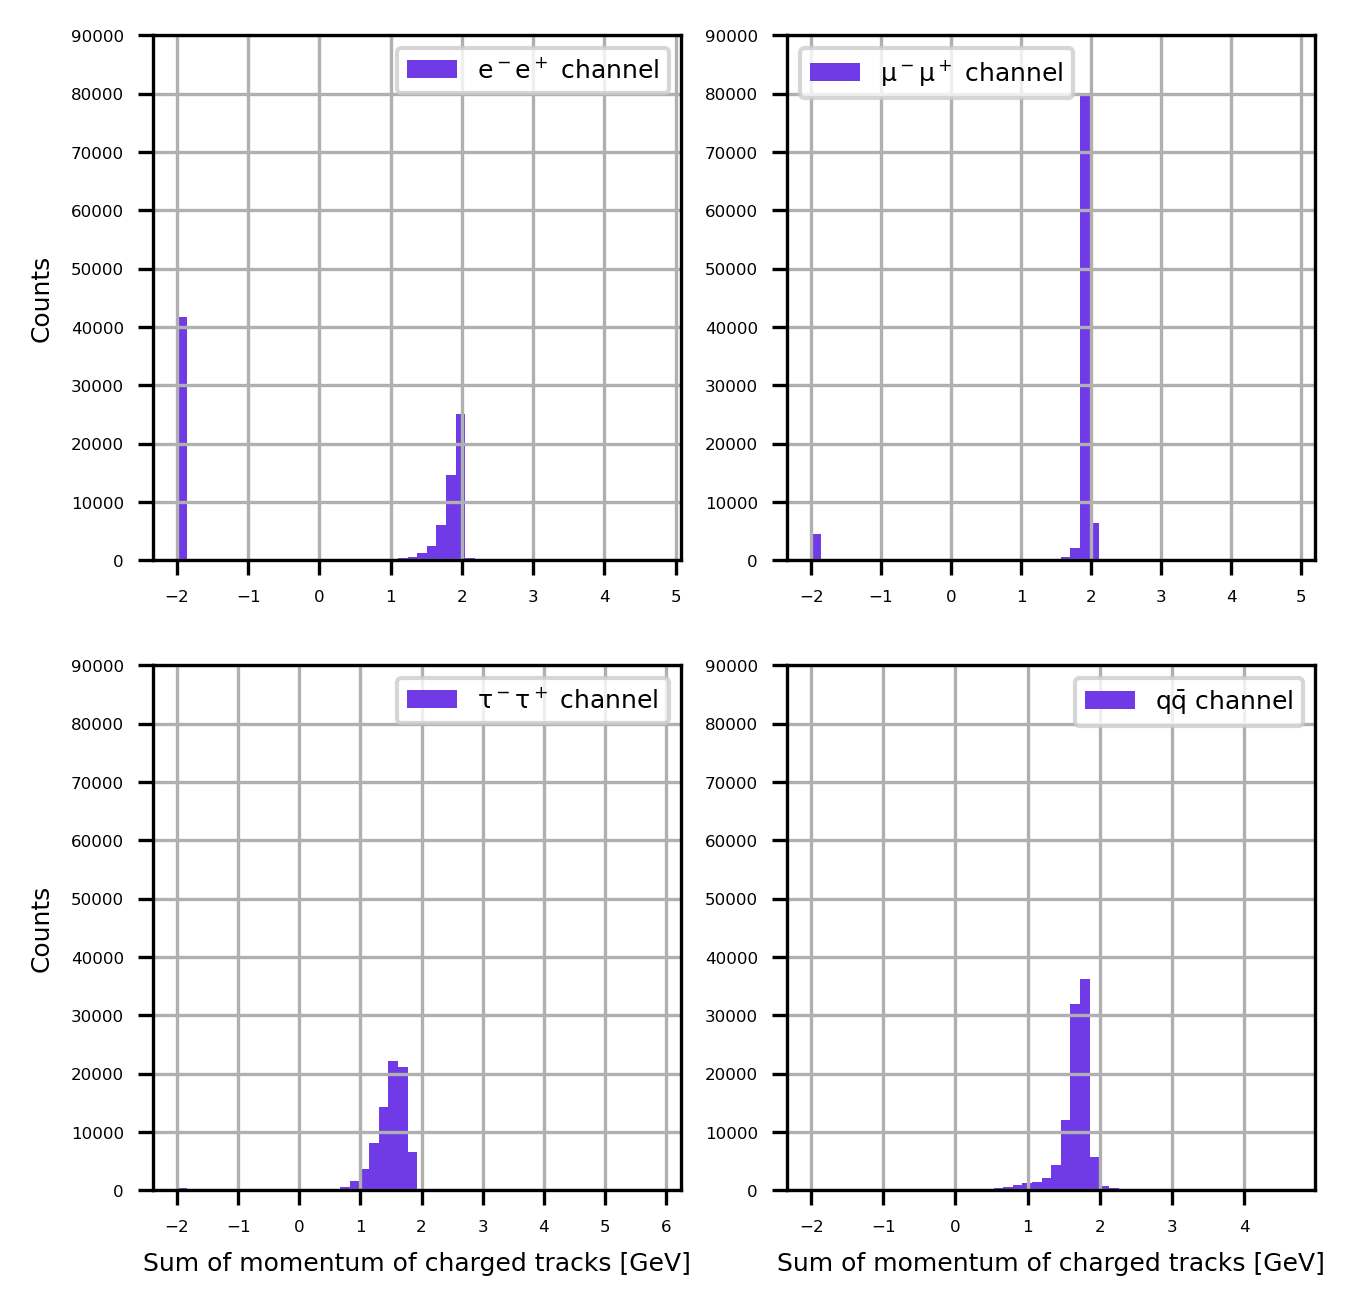

<Figure size 640x480 with 0 Axes>

In [11]:

plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
fig, ax = plt.subplots(2,2,figsize=(5,5),dpi=300)

ax[0,0].set_ylim(0,90000)
ax[0,1].set_ylim(0,90000)
ax[1,0].set_ylim(0,90000)
ax[1,1].set_ylim(0,90000)

ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

Nchargede = np.array(tree['Ncharged'].array())
Pchargede = np.array(tree['Pcharged'].array())
E_ecale = np.array(tree['E_ecal'].array())
E_hcale = np.array(tree['E_hcal'].array())
cos_thrue = np.array(tree['cos_thru'].array())
cos_thete = np.array(tree['cos_thet'].array())


file = uproot.open("../Data/MC/mm.root")
tree = file['h3']

Nchargedm = np.array(tree['Ncharged'].array())
Pchargedm = np.array(tree['Pcharged'].array())
E_ecalm = np.array(tree['E_ecal'].array())
E_hcalm = np.array(tree['E_hcal'].array())
cos_thrum = np.array(tree['cos_thru'].array())
cos_thetm = np.array(tree['cos_thet'].array())


file = uproot.open("../Data/MC/tt.root")
tree = file['h3']

Nchargedt = np.array(tree['Ncharged'].array())
Pchargedt = np.array(tree['Pcharged'].array())
E_ecalt = np.array(tree['E_ecal'].array())
E_hcalt = np.array(tree['E_hcal'].array())
cos_thrut = np.array(tree['cos_thru'].array())
cos_thett = np.array(tree['cos_thet'].array())


file = uproot.open("../Data/MC/qq.root")
tree = file['h3']

Nchargedq = np.array(tree['Ncharged'].array())
Pchargedq = np.array(tree['Pcharged'].array())
E_ecalq = np.array(tree['E_ecal'].array())
E_hcalq = np.array(tree['E_hcal'].array())
cos_thruq = np.array(tree['cos_thru'].array())
cos_thetq = np.array(tree['cos_thet'].array())


ax[0,0].hist(np.log10(Pchargede+0.01),bins=50, color="xkcd:bluish purple",label=r"$\rm{e^-e^+}$ channel")
ax[0,0].set_ylabel("Counts",fontsize=6)



ax[0,1].hist(np.log10(Pchargedm+0.01),bins=50, color="xkcd:bluish purple",label=r"$\rm{\mu^-\mu^+}$ channel")



ax[1,0].hist(np.log10(Pchargedt+0.01),bins=50, color="xkcd:bluish purple",label=r"$\rm{\tau^-\tau^+}$ channel")
ax[1,0].set_xlabel("Sum of momentum of charged tracks [GeV]",fontsize=6)
ax[1,0].set_ylabel("Counts",fontsize=6)


ax[1,1].hist(np.log10(Pchargedq+0.01),bins=50, color="xkcd:bluish purple",label=r"$\rm{q\bar{q}}$ channel")
ax[1,1].set_xlabel("Sum of momentum of charged tracks [GeV]",fontsize=6)
ax[0,0].legend(fontsize=6)
ax[1,0].legend(fontsize=6)
ax[0,1].legend(fontsize=6)
ax[1,1].legend(fontsize=6)
plt.show()
plt.tight_layout()










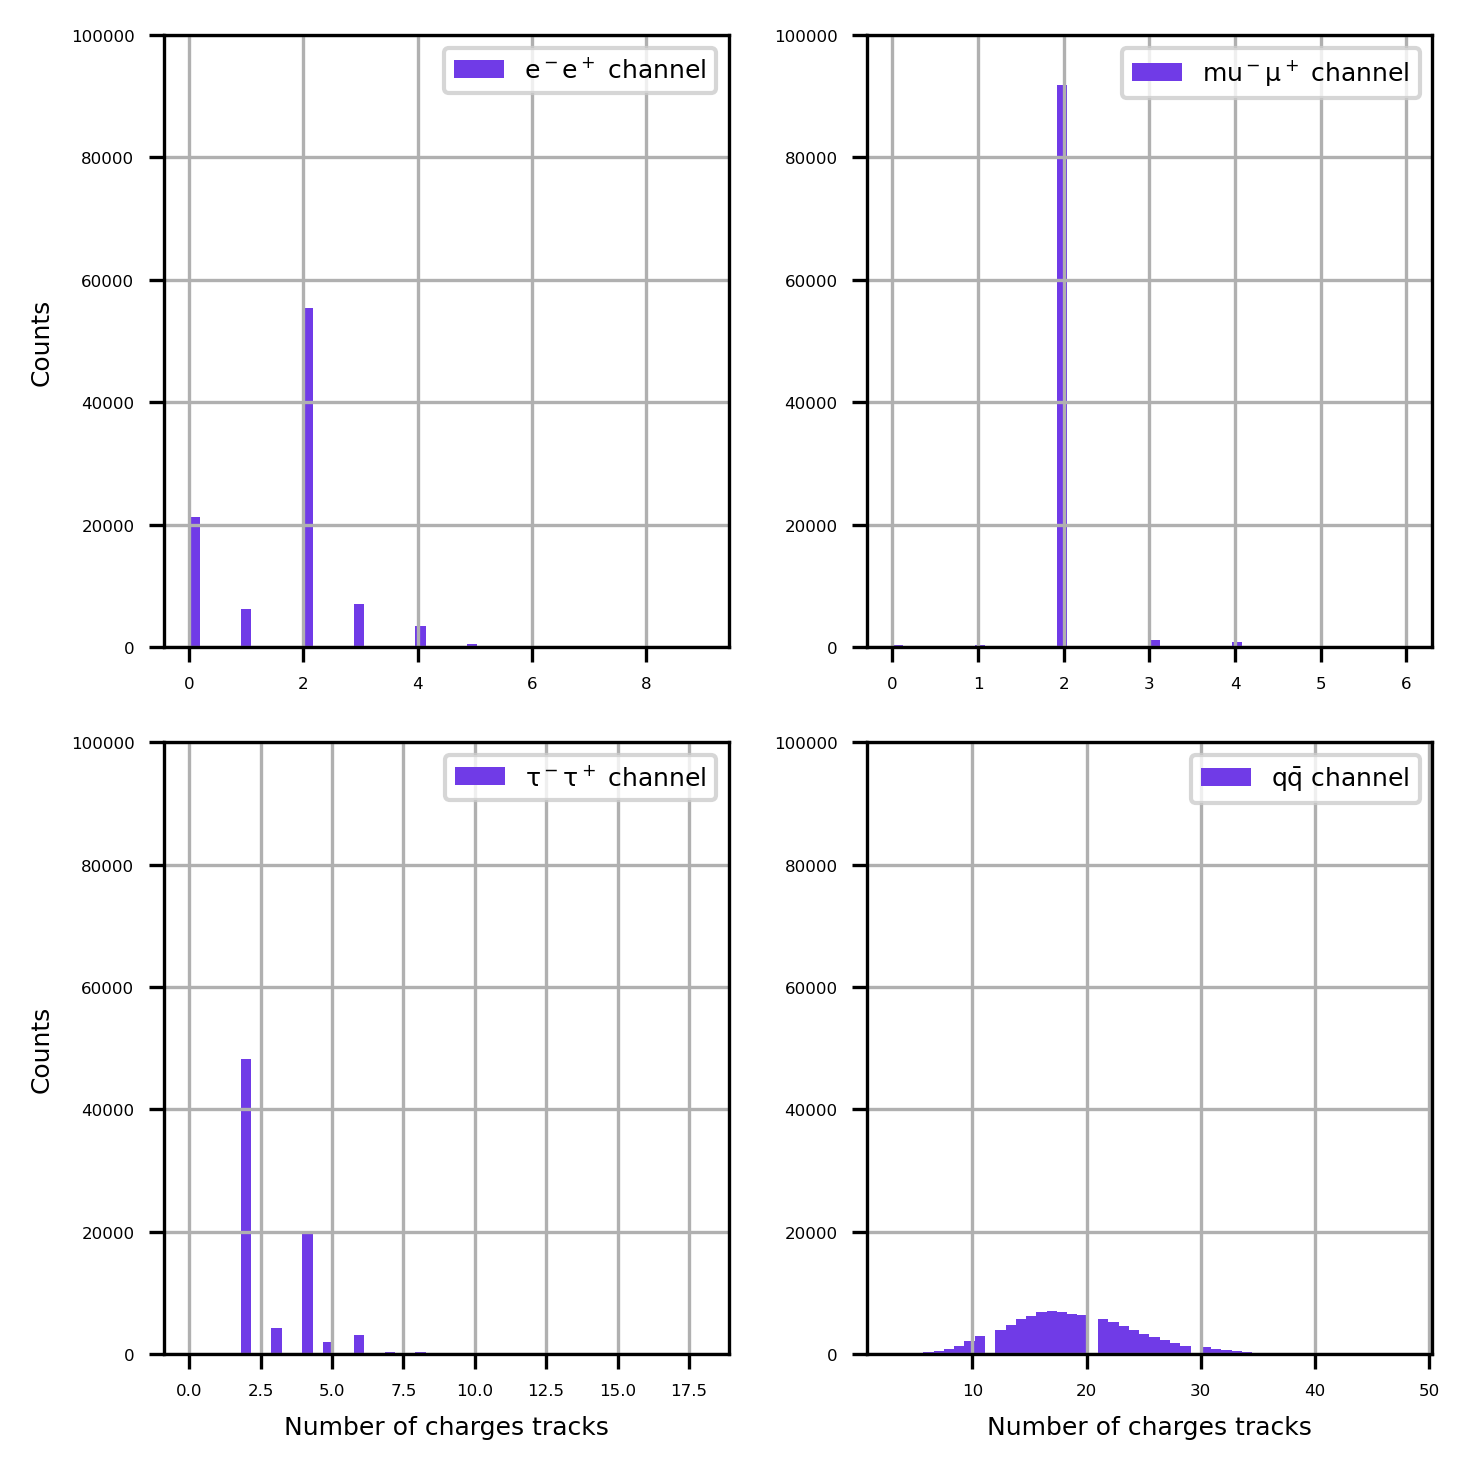

In [12]:

plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
fig, ax = plt.subplots(2,2,figsize=(5,5),dpi=300)
ax[0,0].set_ylim(0,100000)
ax[0,1].set_ylim(0,100000)
ax[1,0].set_ylim(0,100000)
ax[1,1].set_ylim(0,100000)

ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,0].hist(Nchargede,bins=50, color="xkcd:bluish purple",label=r"$\rm{e^-e^+}$ channel")
ax[0,0].set_ylabel("Counts",fontsize=6)


ax[0,1].hist(Nchargedm,bins=50, color="xkcd:bluish purple",label=r"$\rm{mu^-\mu^+}$ channel")


ax[1,0].hist(Nchargedt,bins=50, color="xkcd:bluish purple",label=r"$\rm{\tau^-\tau^+}$ channel")
ax[1,0].set_ylabel("Counts",fontsize=6)
ax[1,0].set_xlabel("Number of charges tracks", fontsize=6)


ax[1,1].hist(Nchargedq,bins=50, color="xkcd:bluish purple",label=r"$\rm{q\bar{q}}$ channel")
ax[1,1].set_xlabel("Number of charges tracks", fontsize=6)
ax[0,0].legend(fontsize=6)
ax[1,0].legend(fontsize=6)
ax[0,1].legend(fontsize=6)
ax[1,1].legend(fontsize=6)
plt.tight_layout()










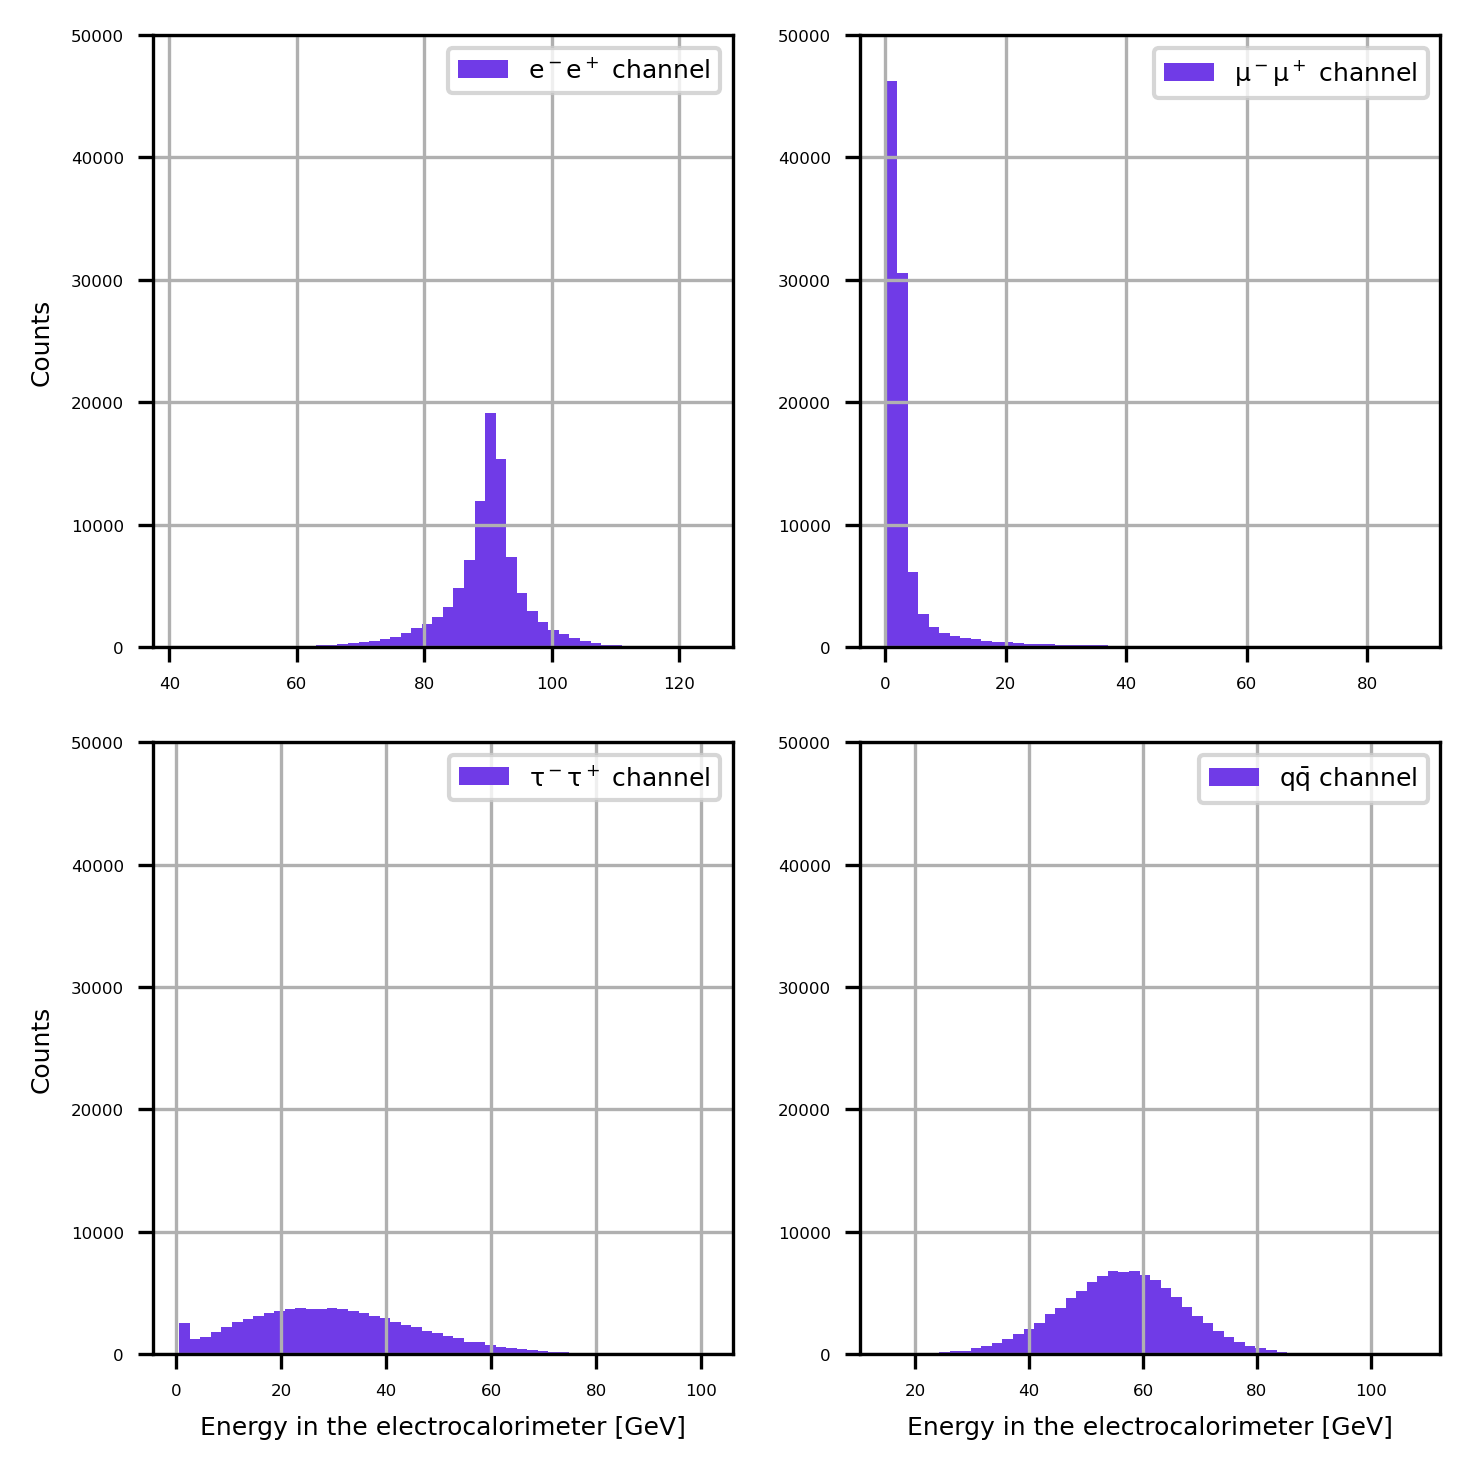

In [13]:

plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
fig, ax = plt.subplots(2,2,figsize=(5,5),dpi=300)
ax[0,0].set_ylim(0,50000)
ax[0,1].set_ylim(0,50000)
ax[1,0].set_ylim(0,50000)
ax[1,1].set_ylim(0,50000)

ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,0].hist(E_ecale,bins=50, color="xkcd:bluish purple",label=r"$\rm{e^-e^+}$ channel")
ax[0,0].set_ylabel("Counts",fontsize=6)


ax[0,1].hist(E_ecalm,bins=50, color="xkcd:bluish purple",label=r"$\rm{\mu^-\mu^+}$ channel")


ax[1,0].hist(E_ecalt,bins=50, color="xkcd:bluish purple",label=r"$\rm{\tau^-\tau^+}$ channel")
ax[1,0].set_ylabel("Counts",fontsize=6)
ax[1,0].set_xlabel("Energy in the electrocalorimeter [GeV]",fontsize=6)


ax[1,1].hist(E_ecalq,bins=50, color="xkcd:bluish purple",label=r"$\rm{q\bar{q}}$ channel")
ax[1,1].set_xlabel("Energy in the electrocalorimeter [GeV]",fontsize=6)
ax[0,0].legend(fontsize=6)
ax[1,0].legend(fontsize=6)
ax[0,1].legend(fontsize=6)
ax[1,1].legend(fontsize=6)
plt.tight_layout()










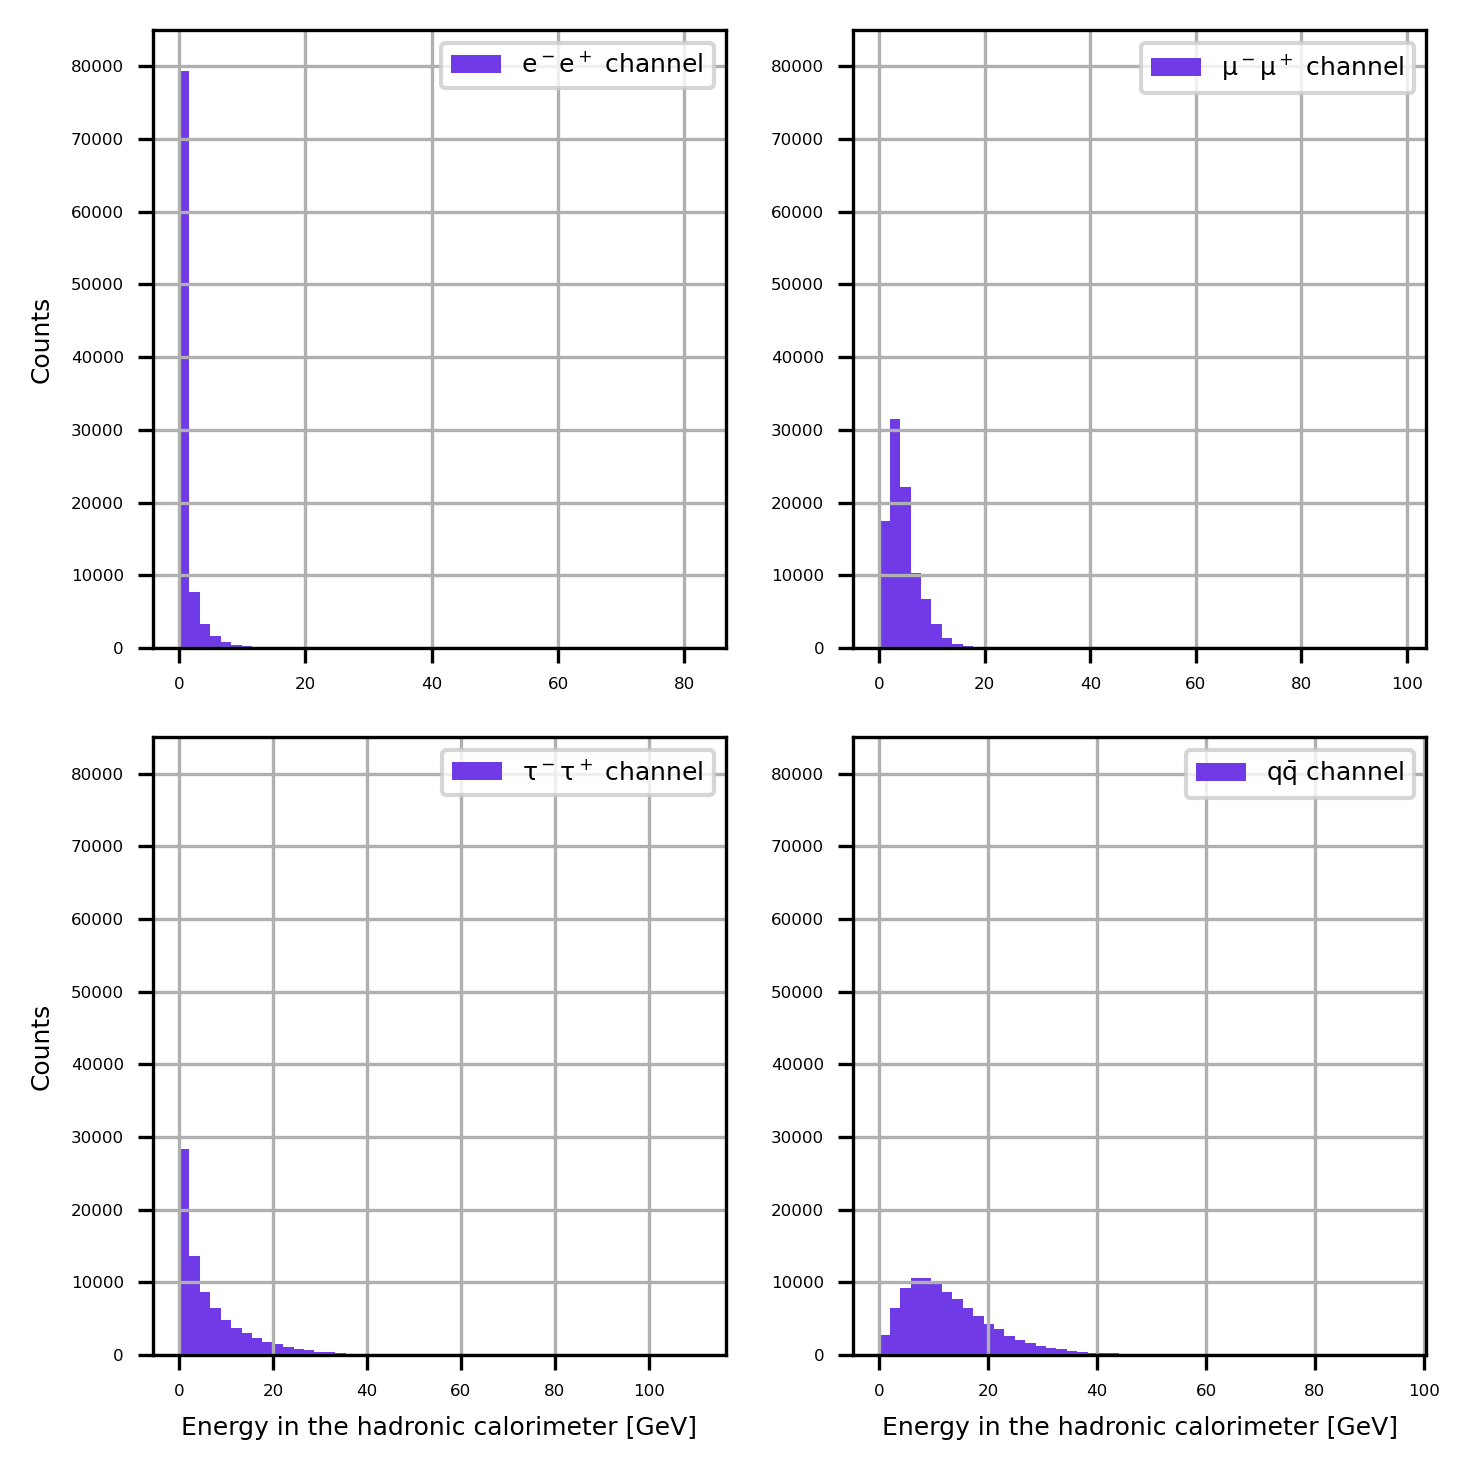

In [14]:

plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
fig, ax = plt.subplots(2,2,figsize=(5,5),dpi=300)
ax[0,0].set_ylim(0,85000)
ax[0,1].set_ylim(0,85000)
ax[1,0].set_ylim(0,85000)
ax[1,1].set_ylim(0,85000)

ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,0].hist(E_hcale,bins=50, color="xkcd:bluish purple",label=r"$\rm{e^-e^+}$ channel")
ax[0,0].set_ylabel("Counts",fontsize=6)


ax[0,1].hist(E_hcalm,bins=50, color="xkcd:bluish purple",label=r"$\rm{\mu^-\mu^+}$ channel")


ax[1,0].hist(E_hcalt,bins=50, color="xkcd:bluish purple",label=r"$\rm{\tau^-\tau^+}$ channel")
ax[1,0].set_ylabel("Counts",fontsize=6)
ax[1,0].set_xlabel("Energy in the hadronic calorimeter [GeV]", fontsize=6)


ax[1,1].hist(E_hcalq,bins=50, color="xkcd:bluish purple",label=r"$\rm{q\bar{q}}$ channel")
ax[1,1].set_xlabel("Energy in the hadronic calorimeter [GeV]", fontsize=6)
ax[0,0].legend(fontsize=6)
ax[1,0].legend(fontsize=6)
ax[0,1].legend(fontsize=6)
ax[1,1].legend(fontsize=6)
plt.tight_layout()










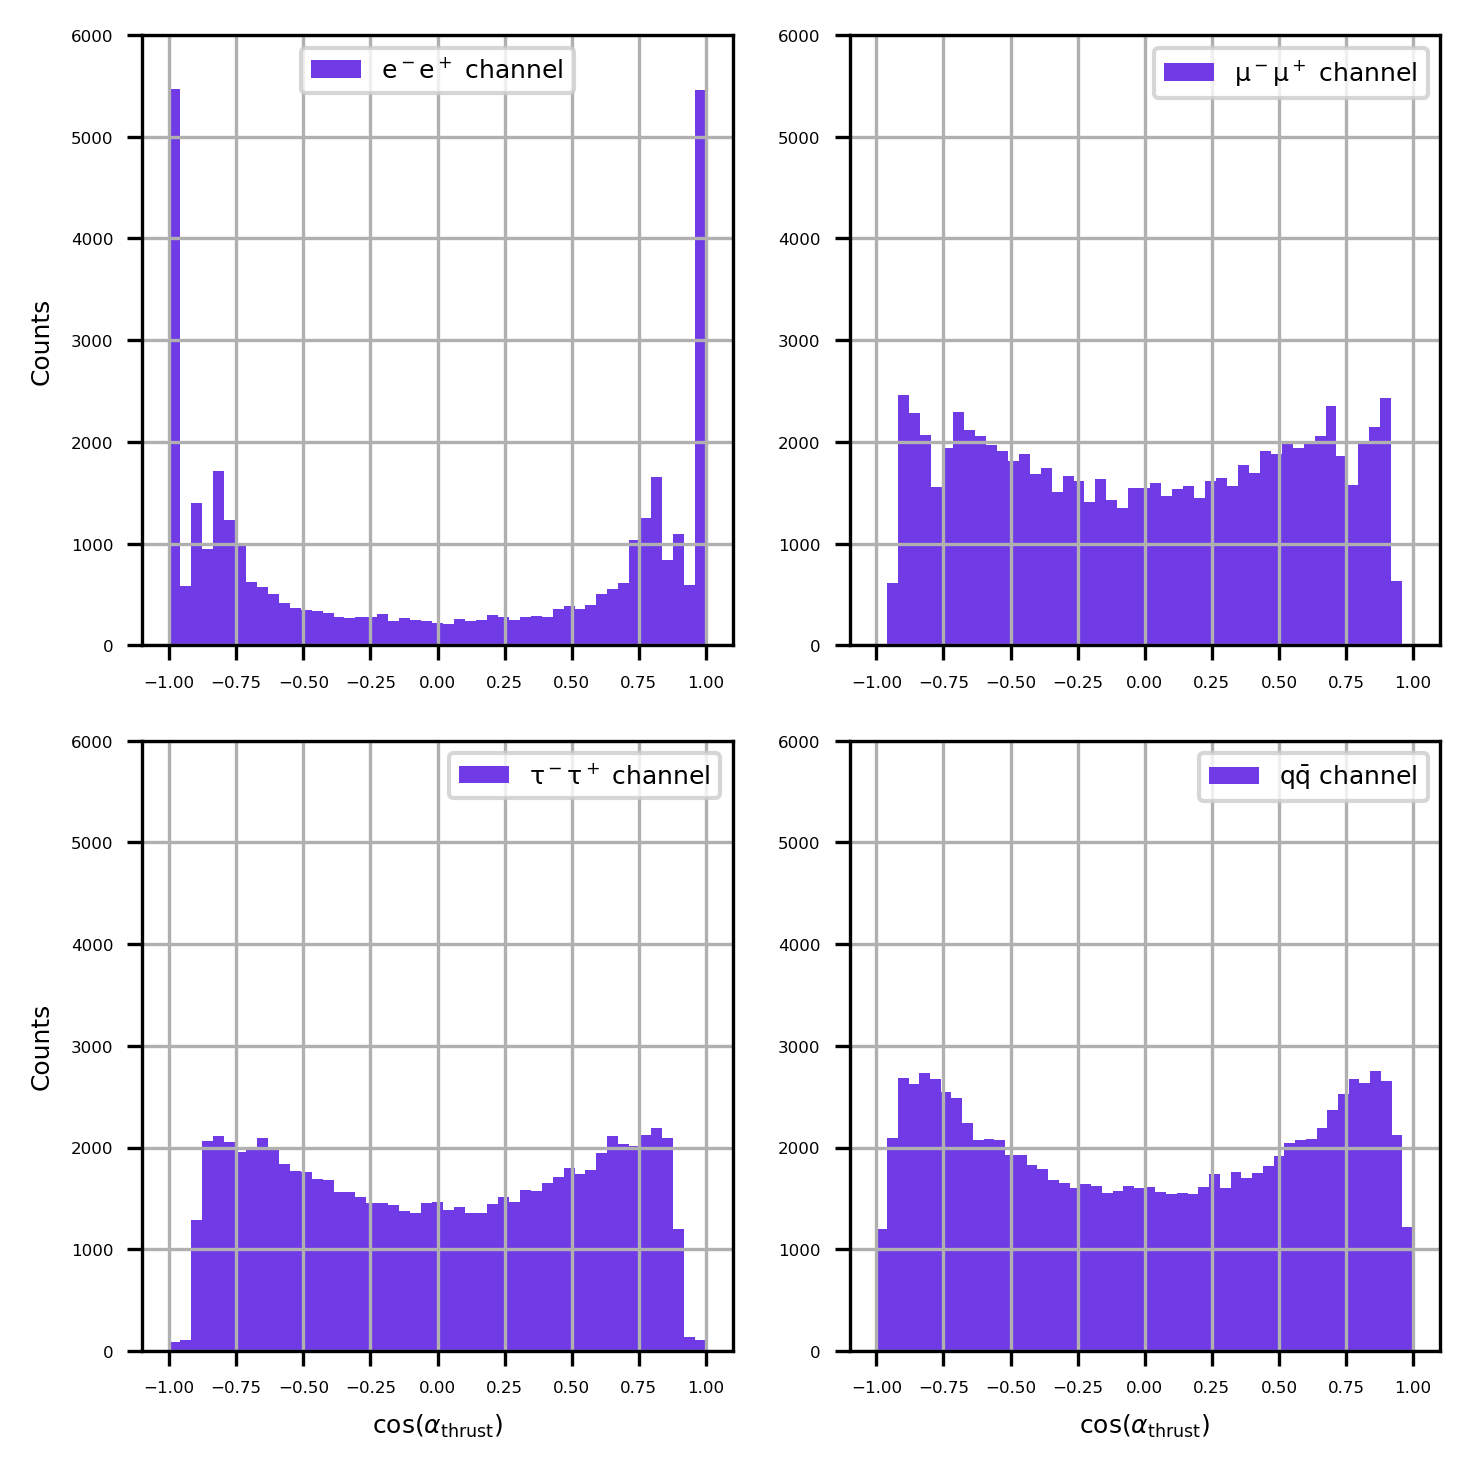

In [15]:

plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
fig, ax = plt.subplots(2,2,figsize=(5,5),dpi=300)
ax[0,0].set_ylim(0,6000)
ax[0,1].set_ylim(0,6000)
ax[1,0].set_ylim(0,6000)
ax[1,1].set_ylim(0,6000)

ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,0].hist(cos_thrue,bins=np.linspace(-1,1,50), color="xkcd:bluish purple",label=r"$\rm{e^-e^+}$ channel")
ax[0,0].set_ylabel("Counts",fontsize=6)


ax[0,1].hist(cos_thrum,bins=np.linspace(-1,1,50), color="xkcd:bluish purple",label=r"$\rm{\mu^-\mu^+}$ channel")


ax[1,0].hist(cos_thrut,bins=np.linspace(-1,1,50), color="xkcd:bluish purple",label=r"$\rm{\tau^-\tau^+}$ channel")
ax[1,0].set_ylabel("Counts",fontsize=6)
ax[1,0].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$", fontsize=6)


ax[1,1].hist(cos_thruq,bins=50, color="xkcd:bluish purple",label=r"$\rm{q\bar{q}}$ channel")
ax[1,1].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$", fontsize=6)
ax[0,0].legend(fontsize=6)
ax[1,0].legend(fontsize=6)
ax[0,1].legend(fontsize=6)
ax[1,1].legend(fontsize=6)
plt.tight_layout()










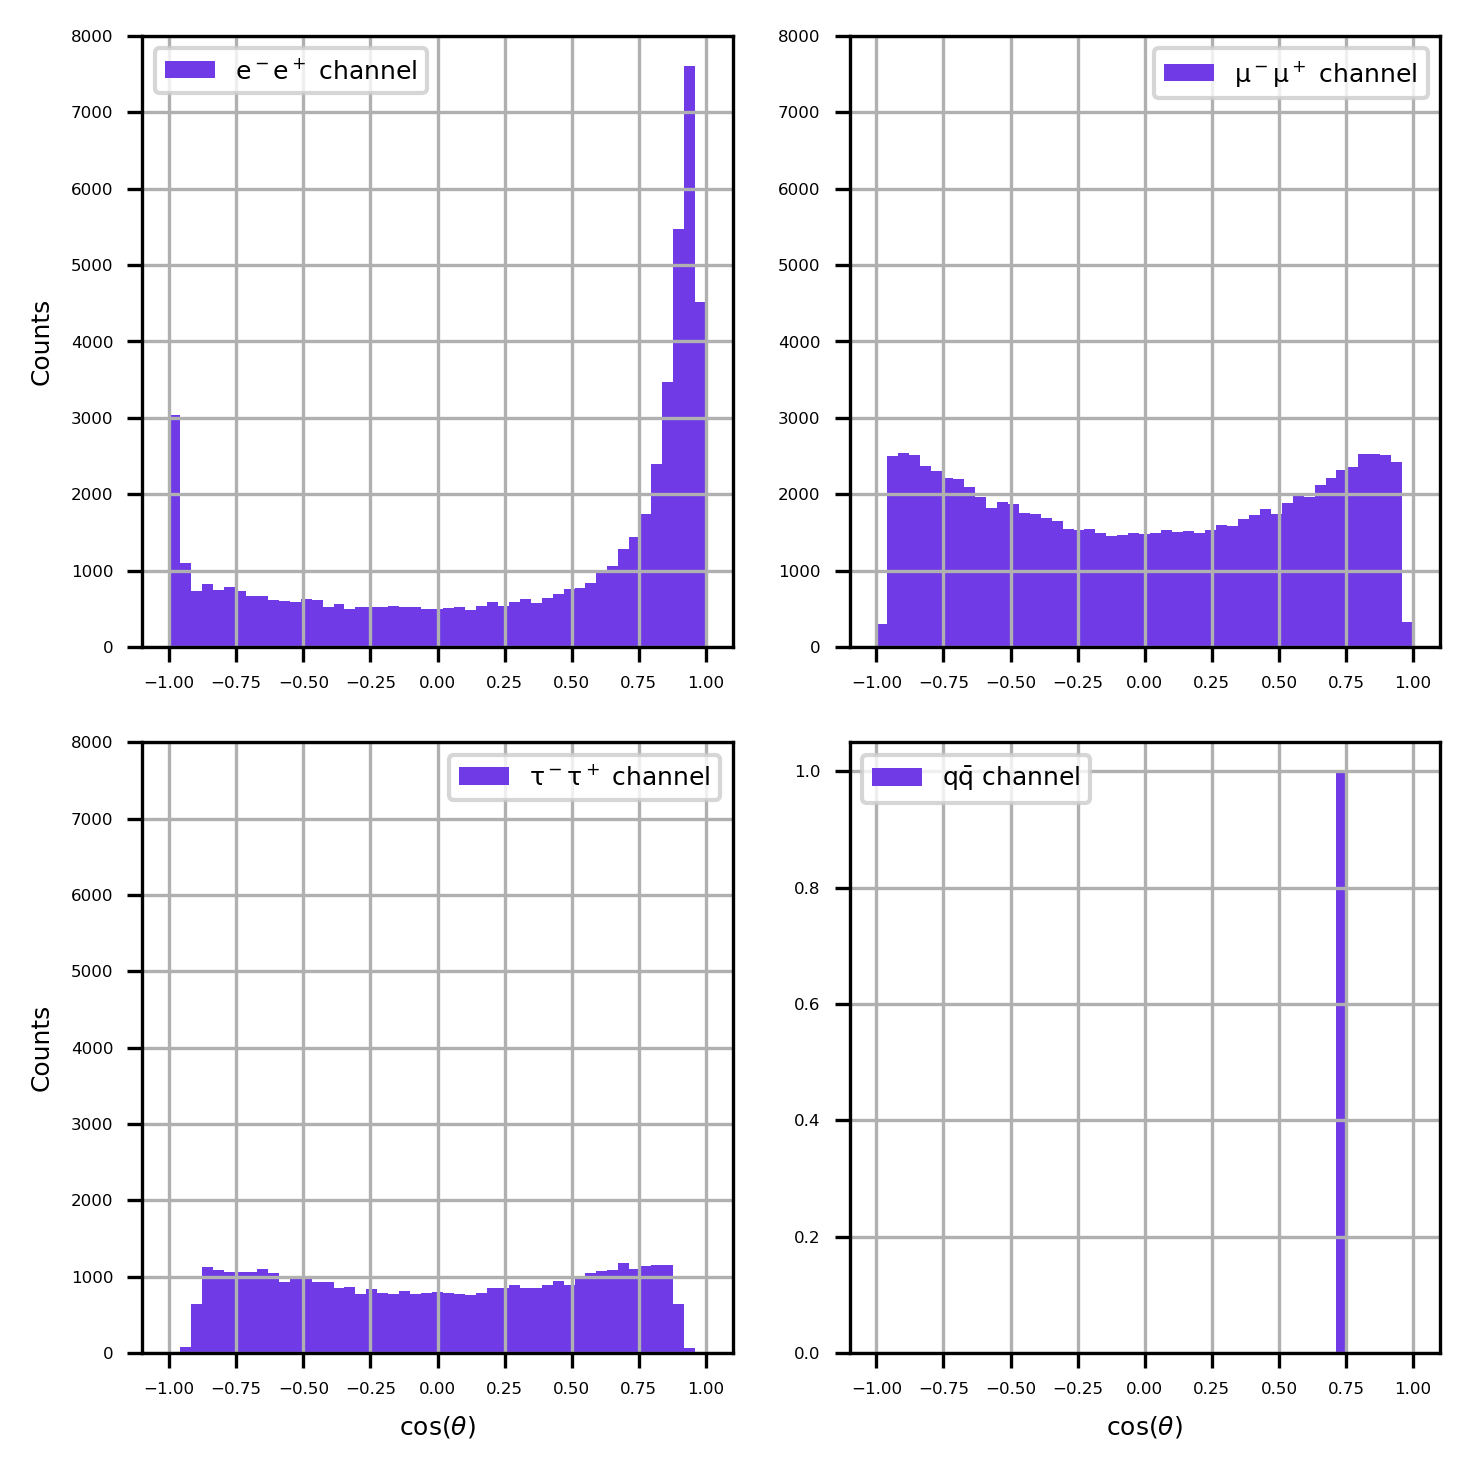

In [16]:

plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
plt.rcParams["xtick.labelsize"]=4
plt.rcParams["ytick.labelsize"]=4
fig, ax = plt.subplots(2,2,figsize=(5,5),dpi=300)
ax[0,0].set_ylim(0,8000)
ax[0,1].set_ylim(0,8000)
ax[1,0].set_ylim(0,8000)
#ax[1,1].set_ylim(0,10000)

ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,0].hist(cos_thete,bins=np.linspace(-1,1,50), color="xkcd:bluish purple",label=r"$\rm{e^-e^+}$ channel")
ax[0,0].set_ylabel("Counts",fontsize=6)


ax[0,1].hist(cos_thetm,bins=np.linspace(-1,1,50), color="xkcd:bluish purple",label=r"$\rm{\mu^-\mu^+}$ channel")


ax[1,0].hist(cos_thett,bins=np.linspace(-1,1,50), color="xkcd:bluish purple",label=r"$\rm{\tau^-\tau^+}$ channel")
ax[1,0].set_ylabel("Counts",fontsize=6)
ax[1,0].set_xlabel(r"$\cos(\theta)$", fontsize=6)


ax[1,1].hist(cos_thetq,bins=np.linspace(-1,1,50), color="xkcd:bluish purple",label=r"$\rm{q\bar{q}}$ channel")
ax[1,1].set_xlabel(r"$\cos(\theta)$", fontsize=6)
ax[0,0].legend(fontsize=6)
ax[1,0].legend(fontsize=6)
ax[0,1].legend(fontsize=6)
ax[1,1].legend(fontsize=6)
plt.tight_layout()










## Part 2.2 - Separating s-t channels

For $\rm{e^{+}e^{-}}$ channel, not only annihiliation processes (s-channel) are present, but also scattering processes (t-channel). Nevertheless, the Z0 boson can only be produced in the first one and, thus, only those events contribute to the decay width. For that reason, those events must also be selected out.

The two channels differ on their angular distribution:

$\frac{d\sigma}{d\Omega} \alpha \left\{\begin{array}{@{}lr@{}}
        1+\cos^2(\theta), & \text{s-channel}\\
        (1-\cos \theta)^{-2}, & \text{t-channel}\\
        \end{array}\right.$

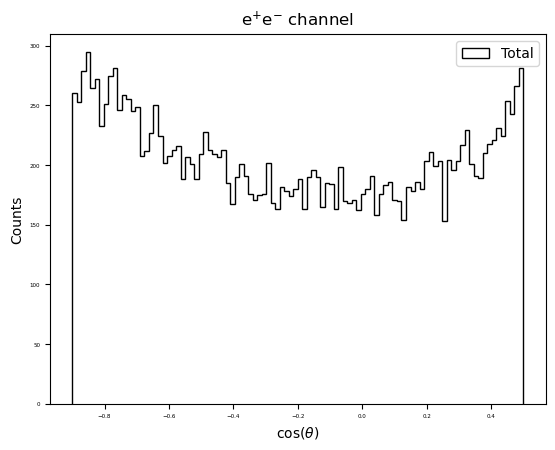

In [17]:
file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

cos_thet = np.array(tree['cos_thet'].array())

# A first safe cos_theta cut must be applied

mask_safe = (cos_thet>-0.9) & (cos_thet<0.5)

data_hist = plt.hist(cos_thet[mask_safe],bins=np.linspace(-0.9,0.5,101),color='black',label='Total',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

We now define a fit function of the type:

$a (1+\cos^2(\theta)) + b (1-\cos \theta)^2$

where $a$ and $b$ are free parameters

In [18]:
def fitFunction(x,a,b):
    
    return(a*(1+x*x) + b*1/(1-x)**2)

Fitted parameters:
a = 156.0605806321217 +- 1.745865192485392
b = 16.390767821098247 +- 1.5615445898817786


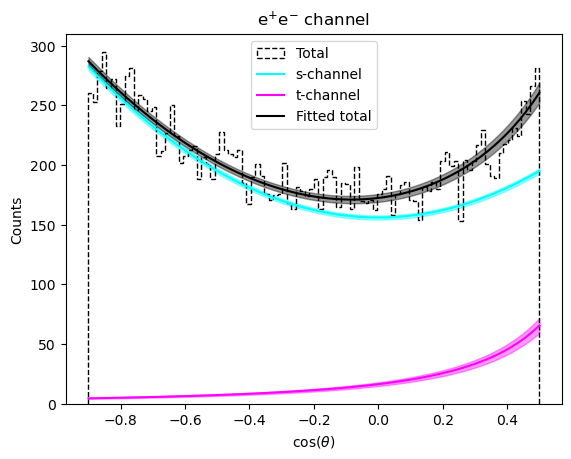

In [19]:

plt.rcParams["xtick.labelsize"]=10
plt.rcParams["ytick.labelsize"]=10
popt, pcov = curve_fit(fitFunction, data_hist[1][:-1] + (data_hist[1][1] - data_hist[1][0])/2., data_hist[0], bounds=(0,10000))
print("Fitted parameters:")
print(f"a = {popt[0]} +- { np.sqrt(np.diag(pcov))[0] }")
print(f"b = {popt[1]} +- { np.sqrt(np.diag(pcov))[1] }")

plt.hist(cos_thet[mask_safe],bins=np.linspace(-0.9,0.5,101),color='black',label='Total',histtype='step',linestyle='--')
plt.plot(np.linspace(-0.9,0.5,101),popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2),label='s-channel',color='cyan')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[0]-np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2),(popt[0]+np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2),alpha=0.4,color='cyan')
plt.plot(np.linspace(-0.9,0.5,101),popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,label='t-channel',color='magenta')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[1]-np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,(popt[1]+np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,alpha=0.4,color='magenta')
plt.plot(np.linspace(-0.9,0.5,101),popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2) + popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,color='black',label='Fitted total')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[0]-np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2) + (popt[1]-np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,(popt[0]+np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2) + (popt[1]+np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,alpha=0.4,color='black')

plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

### Exercises

Using the results of the fit:

2.2.1. Calculate the fraction of s-channel events in the region $\cos \theta \in [-0.9,0.5]$

2.2.2. Calculate the fraction of s-channel events in $\cos \theta \in [-0.9,0.5]$ to relation to those in $\cos \theta \in [-1,1]$

total:  287.0648739079364 +- 1.4315917000000509e-08
s:  262.910058171581 +- 2.918887999876285e-12
2:  2040.790448568333 +- 4.930315425727416e-06
3:  409.95023320277903 +- 4.551361878521776e-12
fraction:  0.9158558990254517
fraction2:  0.20087816144492918


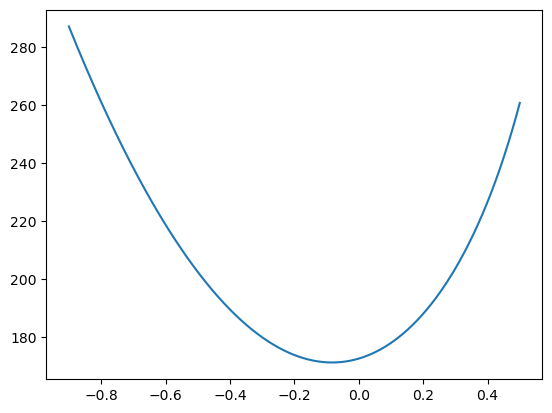

In [20]:
lin = np.linspace(-0.9,0.5,10000)
a = popt[0]
b = popt[1]
plt.plot(lin, fitFunction(lin, a, b))

integral, fehler = sp.integrate.quad(fitFunction, -0.9, 0.5, args=(a,b))
print("total: ", integral, "+-", fehler) 

integrals, fehlers = sp.integrate.quad(fitFunction, -0.9, 0.5, args=(a,0))
print("s: ", integrals, "+-", fehlers)

integral2, fehlers = sp.integrate.quad(fitFunction, -0.99, 0.99, args=(a,b))
print("2: ", integral2, "+-", fehlers)

integral3, fehlers = sp.integrate.quad(fitFunction, -0.99, 0.99, args=(a,0))
print("3: ", integral3, "+-", fehlers)

print("fraction: ", integrals/integral)

print("fraction2: ", integral3/integral2)

s:  2.893099124999999 +- 4.6203213294440616e-12


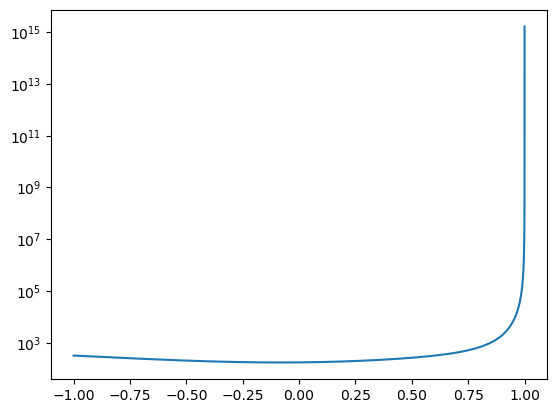

In [21]:
lin = np.linspace(-1,0.9999999,10000)
a = popt[0]
b = popt[1]
plt.plot(lin, fitFunction(lin, a, b))
plt.yscale("log")

integrals1, fehlers = sp.integrate.quad(fitFunction, -1, 1, args=(a,0))
print("s: ", integrals*0.9159/(integrals1*0.2), "+-", fehlers)


In [22]:
fracSChannel = 0.9159 # from 2.2.1.
totalSChannel = 416.16 # from 2.2.2.

## Part 2.3 - Defining selection cuts

As we just learned, events cannot be singularly defined, but they can be defined by their distributions. The idea of this part if to come up with four sets of cuts to separate the four channels

0.9385685250000001 (20495/100000) events of channel ee surviving example e cuts
0.0 (0/100000) events of channel ee surviving example m cuts
0.0 (0/100000) events of channel ee surviving example q cuts
0.03322 (3322/100000) events of channel ee surviving example t cuts


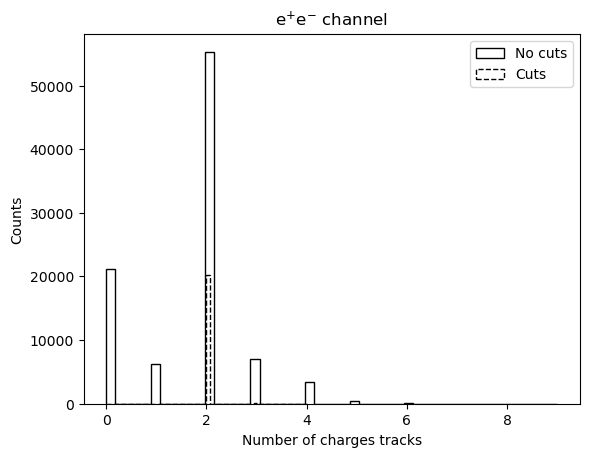

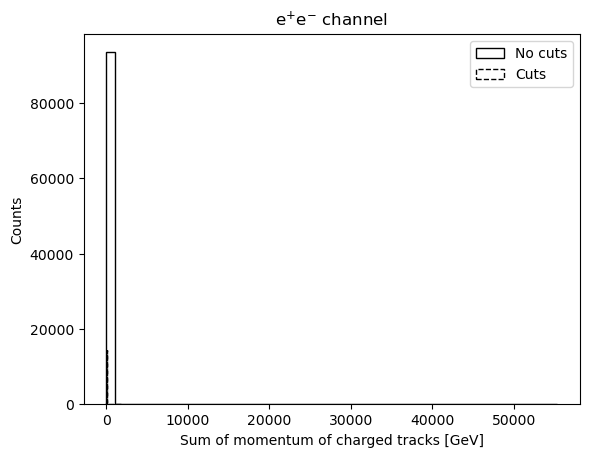

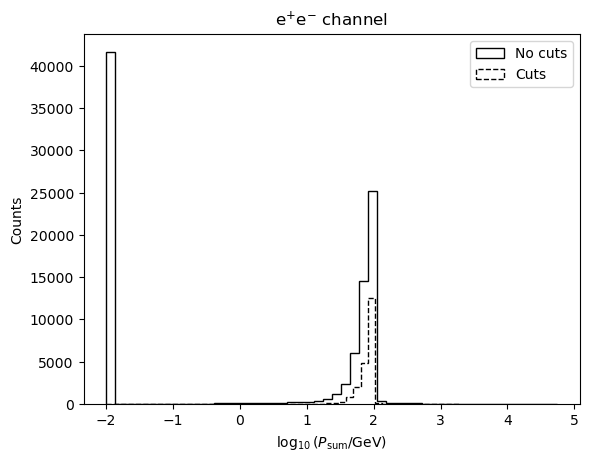

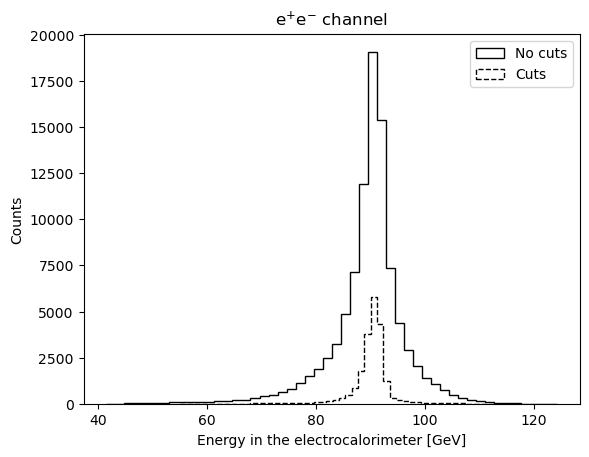

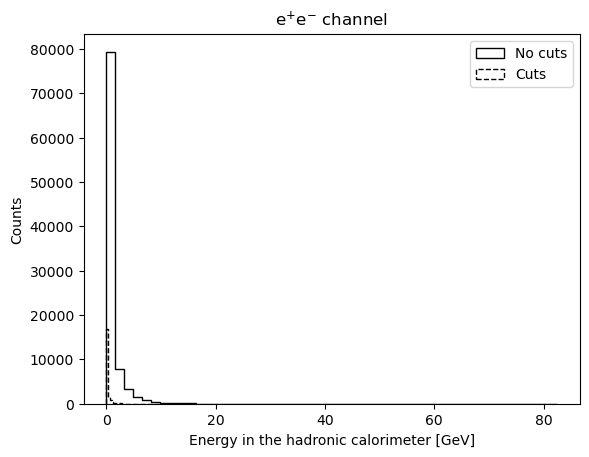

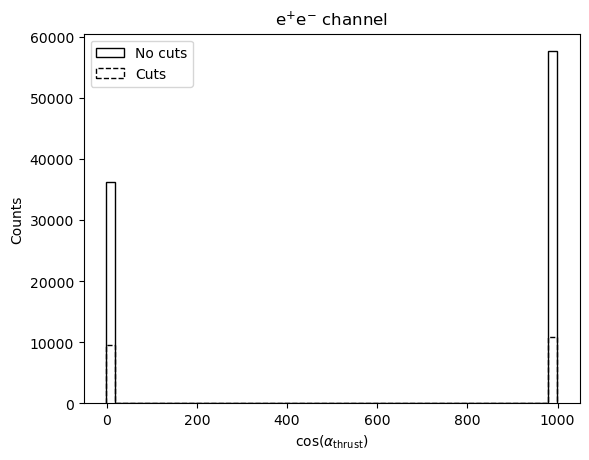

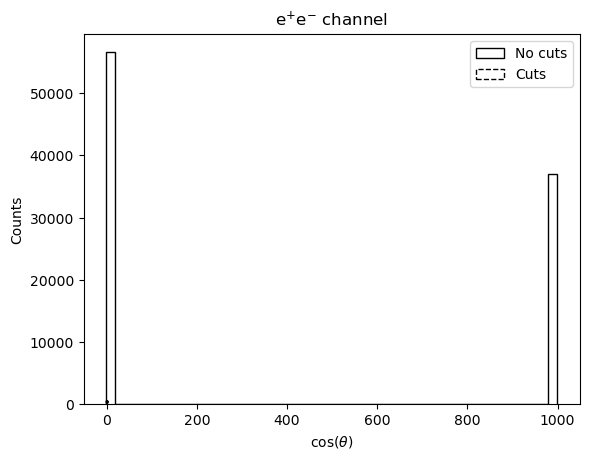

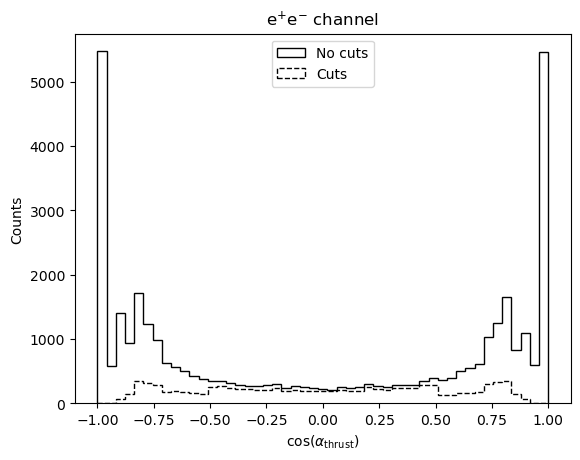

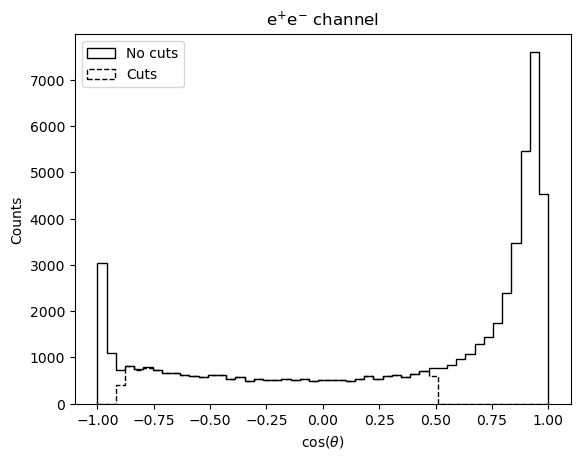

In [31]:
# Example for a single channel

file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask = (mask_safe) & (Ncharged < 6) & (E_hcal < 17) & (E_ecal > 55) # completely random cuts, just to show the syntax needed!
maskm = (mask_safe) & (Ncharged < 5) & (Ncharged >1.8) &(E_hcal < 10) & (E_ecal < 10)
maskq = (Ncharged >7) & (E_ecal<80) & (E_ecal > 40)
maskt = (Ncharged >1.8) & (Ncharged <8) &(E_ecal<80) & (E_ecal > 5)

print(f"{len(E_ecal[mask])*0.9159/(100000*0.2)} ({len(E_ecal[mask])}/100000) events of channel ee surviving example e cuts")
print(f"{len(E_ecal[maskm])/100000} ({len(E_ecal[maskm])}/100000) events of channel ee surviving example m cuts")
print(f"{len(E_ecal[maskq])/100000} ({len(E_ecal[maskq])}/100000) events of channel ee surviving example q cuts")
print(f"{len(E_ecal[maskt])/100000} ({len(E_ecal[maskt])}/100000) events of channel ee surviving example t cuts")

plt.hist(Ncharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Ncharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(Pcharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Pcharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50,color='black',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged[mask]+0.01),bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_ecal[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_hcal[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[mask],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[mask],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

0.079179555 (1729/100000) events of channel tt surviving example e cuts
0.06137 (6137/100000) events of channel tt surviving example m cuts
0.00263 (263/100000) events of channel tt surviving example q cuts
0.7411 (74110/100000) events of channel tt surviving example t cuts


IndexError: boolean index did not match indexed array along dimension 0; dimension is 79214 but corresponding boolean dimension is 175883

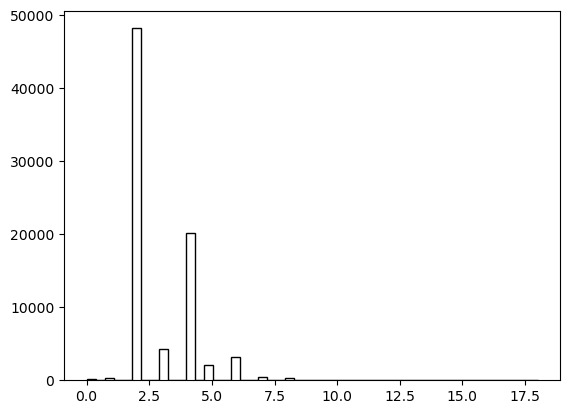

In [44]:
# Example for a single channel

file = uproot.open("../Data/MC/tt.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
maske = (mask_safe) & (Ncharged < 6) & (E_hcal < 17) & (E_ecal > 55) # completely random cuts, just to show the syntax needed!
maskm = (Ncharged < 5) & (Ncharged >1.8) &(E_hcal < 10) & (E_ecal < 10)
maskq = (Ncharged >7) & (E_ecal<80) & (E_ecal > 40)
maskt = (Ncharged >1.8) & (Ncharged <8) &(E_ecal<80) & (E_ecal > 5)

print(f"{len(E_ecal[maske])*0.9159/(100000*0.2)} ({len(E_ecal[maske])}/100000) events of channel tt surviving example e cuts")
print(f"{len(E_ecal[maskm])/100000} ({len(E_ecal[maskm])}/100000) events of channel tt surviving example m cuts")
print(f"{len(E_ecal[maskq])/100000} ({len(E_ecal[maskq])}/100000) events of channel tt surviving example q cuts")
print(f"{len(E_ecal[maskt])/100000} ({len(E_ecal[maskt])}/100000) events of channel tt surviving example t cuts")

plt.hist(Ncharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Ncharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(Pcharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Pcharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50,color='black',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged[mask]+0.01),bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_ecal[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_hcal[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()
0.01729 
plt.hist(cos_thet,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[mask],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[mask],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

4.5795000000000005e-05 (1/100000) events of channel mm surviving example e cuts
0.82116 (82116/100000) events of channel mm surviving example m cuts
0.0 (0/100000) events of channel mm surviving example q cuts
0.12425 (12425/100000) events of channel mm surviving example t cuts


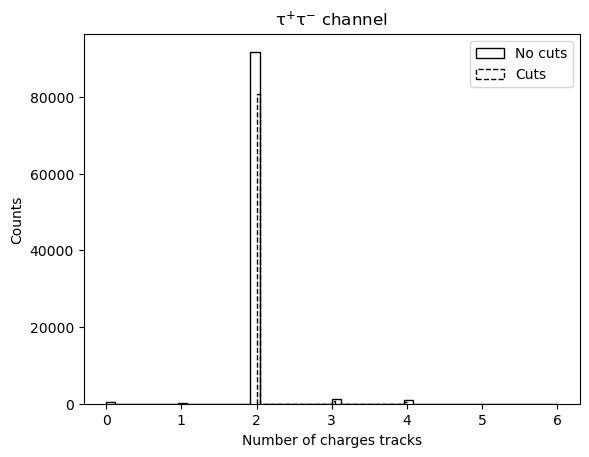

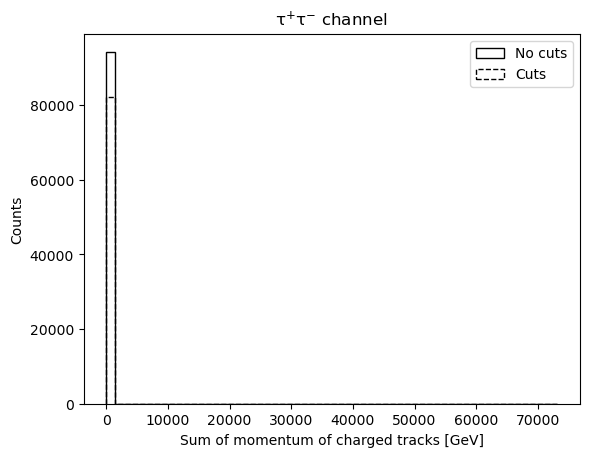

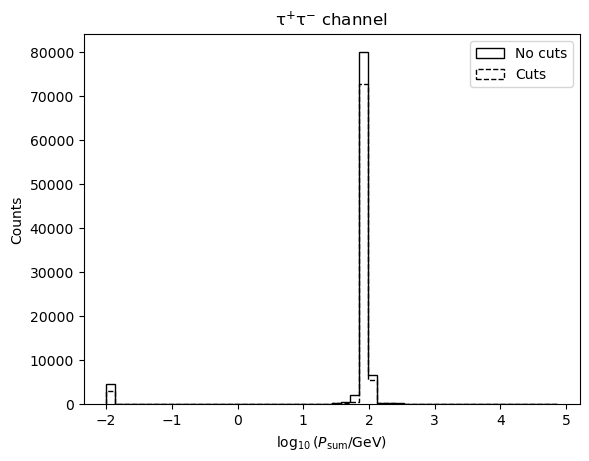

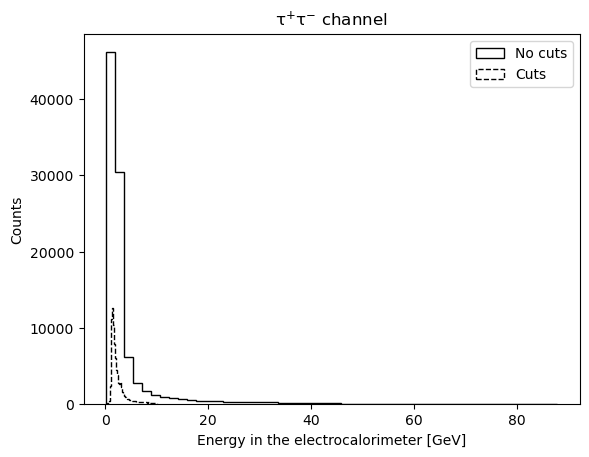

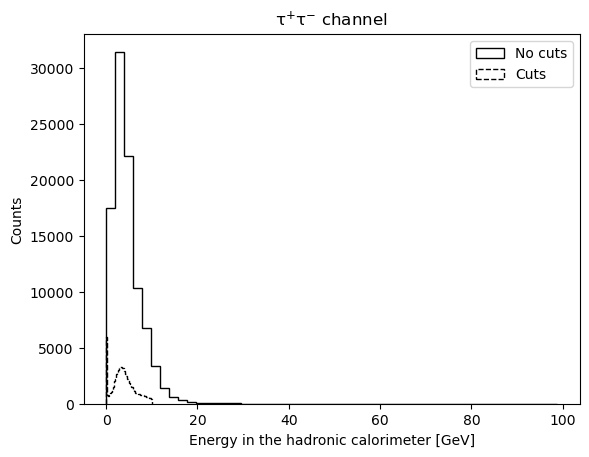

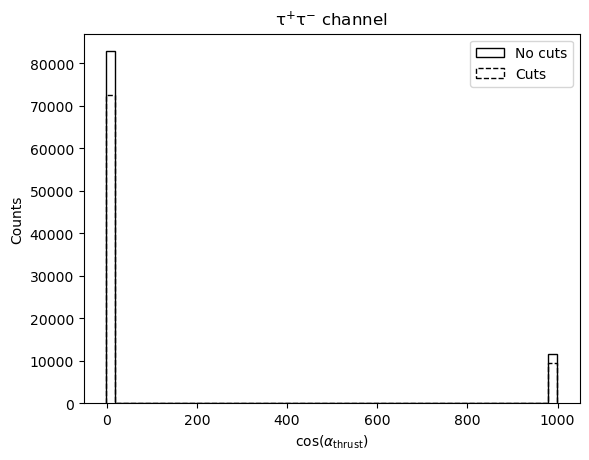

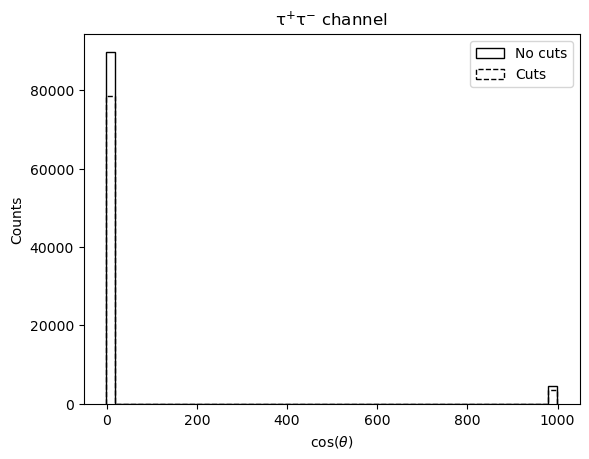

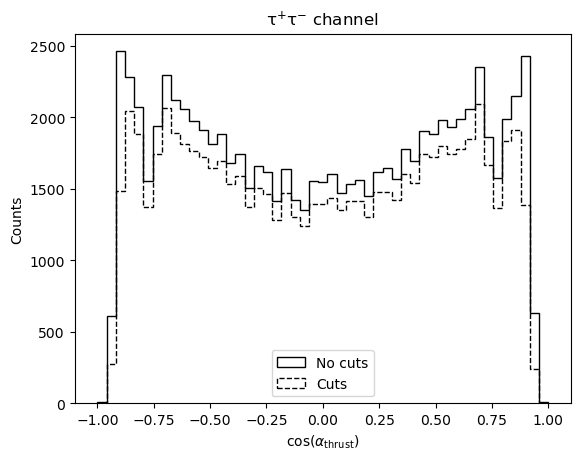

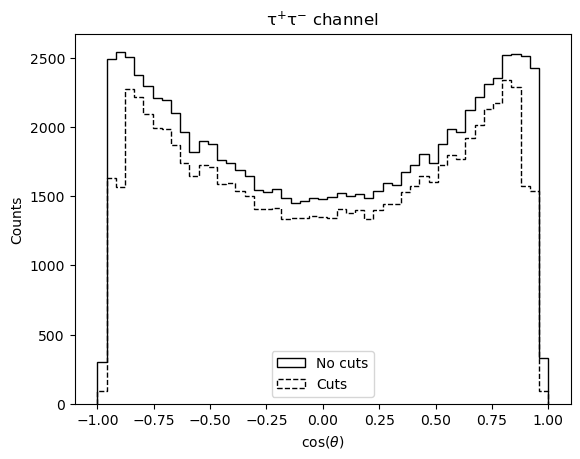

In [45]:
# Example for a single channel

file = uproot.open("../Data/MC/mm.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
maske = (mask_safe) & (Ncharged < 6) & (E_hcal < 17) & (E_ecal > 55) # completely random cuts, just to show the syntax needed!
maskm = (Ncharged < 5) & (Ncharged >1.8) &(E_hcal < 10) & (E_ecal < 10) 
maskq = (Ncharged >7) & (E_ecal<80) & (E_ecal > 40)
maskt = (Ncharged >1.8) & (Ncharged <8) &(E_ecal<80) & (E_ecal > 5)

print(f"{len(E_ecal[maske])*0.9159/(100000*0.2)} ({len(E_ecal[maske])}/100000) events of channel mm surviving example e cuts")
print(f"{len(E_ecal[maskm])/100000} ({len(E_ecal[maskm])}/100000) events of channel mm surviving example m cuts")
print(f"{len(E_ecal[maskq])/100000} ({len(E_ecal[maskq])}/100000) events of channel mm surviving example q cuts")
print(f"{len(E_ecal[maskt])/100000} ({len(E_ecal[maskt])}/100000) events of channel mm surviving example t cuts")

plt.hist(Ncharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Ncharged[maskm],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(Pcharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Pcharged[maskm],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50,color='black',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged[maskm]+0.01),bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_ecal[maskm],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_hcal[maskm],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[maskm],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()
0.01729 
plt.hist(cos_thet,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[maskm],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[maskm],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[maskm],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

0.0 (0/100000) events of channel qq surviving example e cuts
0.0 (0/100000) events of channel qq surviving example m cuts
0.89773 (89773/100000) events of channel qq surviving example q cuts
0.00993 (993/100000) events of channel qq surviving example t cuts


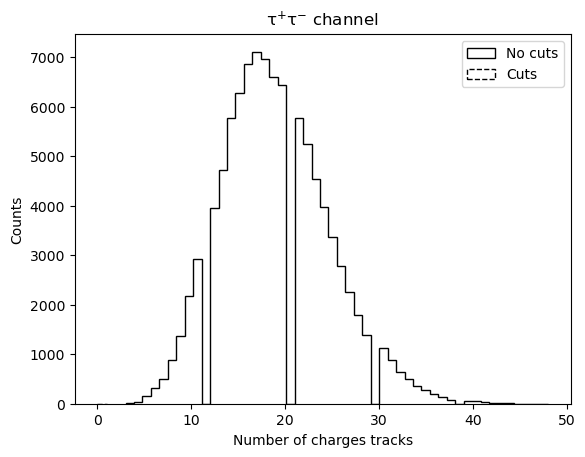

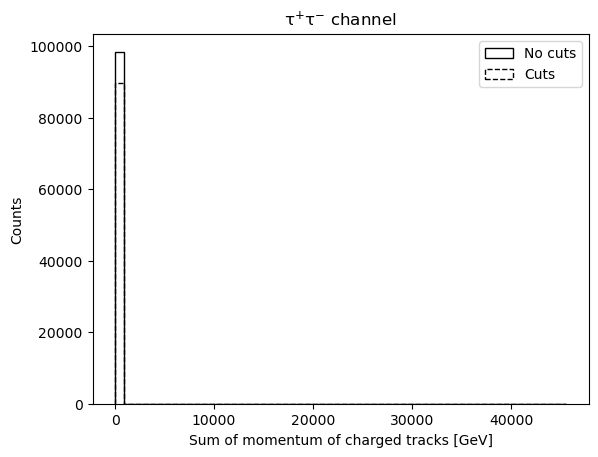

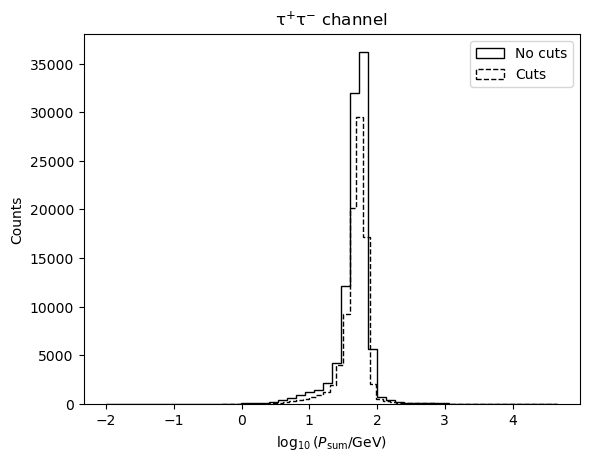

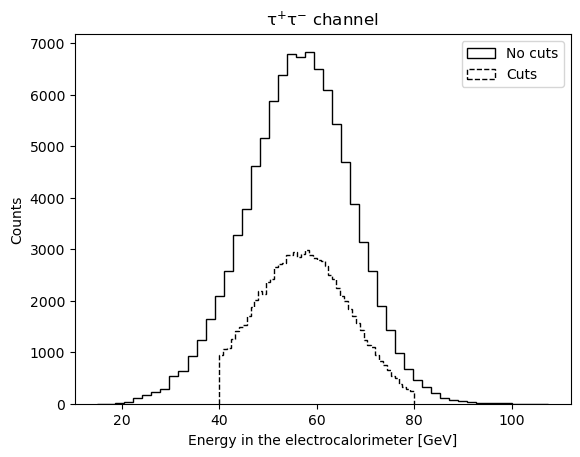

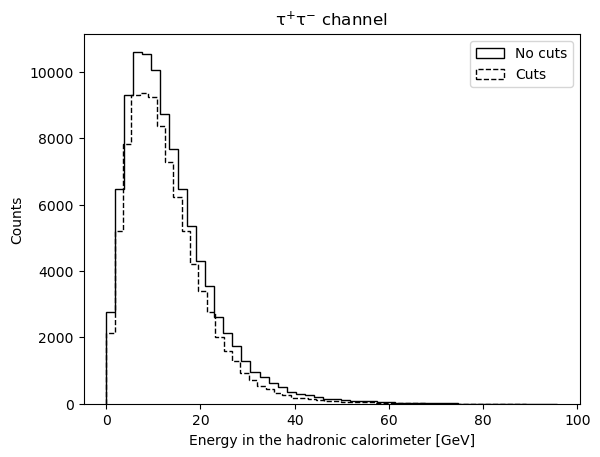

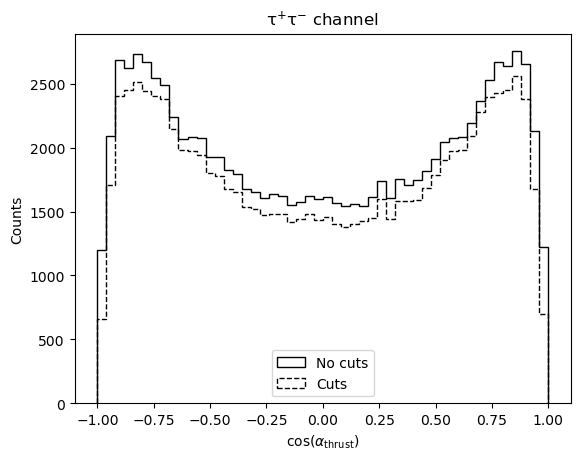

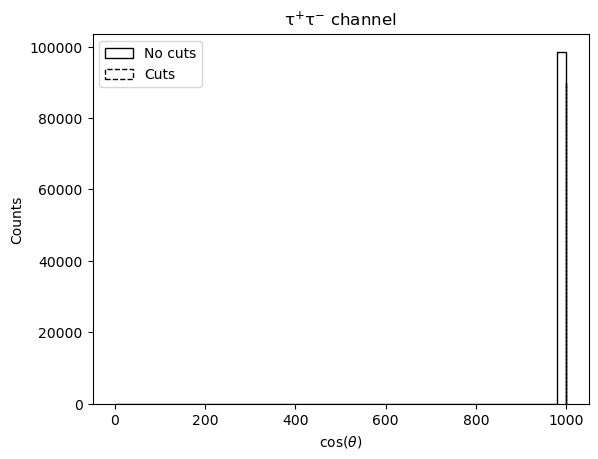

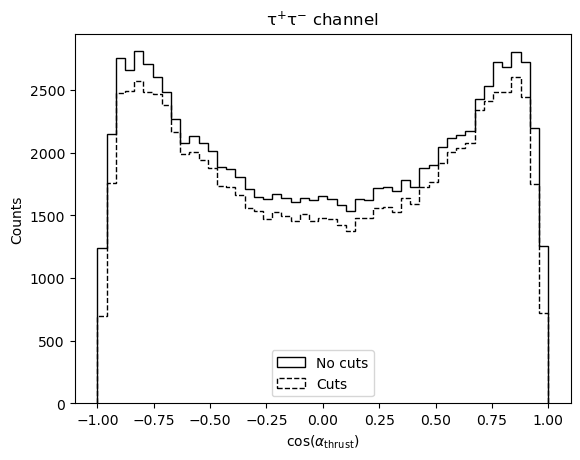

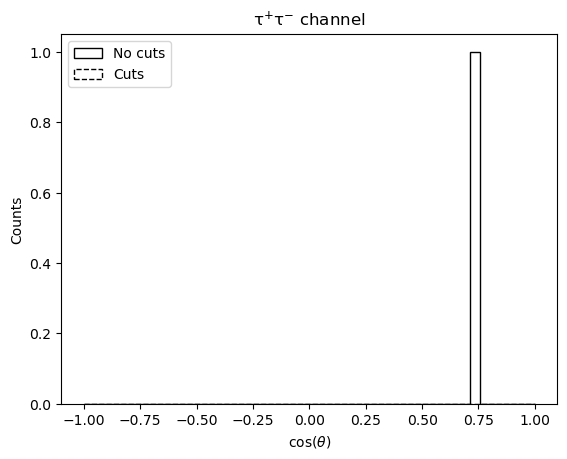

In [46]:
# Example for a single channel

file = uproot.open("../Data/MC/qq.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
maske = (mask_safe) & (Ncharged < 6) & (E_hcal < 17) & (E_ecal > 55) # completely random cuts, just to show the syntax needed!
maskm = (Ncharged < 5) & (Ncharged >1.8) &(E_hcal < 10) & (E_ecal < 10)
maskq = (Ncharged >7) & (E_ecal<80) & (E_ecal > 40)
maskt = (Ncharged >1.8) & (Ncharged <8) &(E_ecal<80) & (E_ecal > 5)

print(f"{len(E_ecal[maske])*0.9159/(100000*0.2)} ({len(E_ecal[maske])}/100000) events of channel qq surviving example e cuts")
print(f"{len(E_ecal[maskm])/100000} ({len(E_ecal[maskm])}/100000) events of channel qq surviving example m cuts")
print(f"{len(E_ecal[maskq])/100000} ({len(E_ecal[maskq])}/100000) events of channel qq surviving example q cuts")
print(f"{len(E_ecal[maskt])/100000} ({len(E_ecal[maskt])}/100000) events of channel qq surviving example t cuts")

plt.hist(Ncharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Ncharged[maske],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(Pcharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Pcharged[maskq],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50,color='black',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged[maskq]+0.01),bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_ecal[maskq],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_hcal[maskq],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[maskq],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()
0.01729 
plt.hist(cos_thet,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[maskq],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[maskq],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[maskq],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

In [27]:
# Example for a single channel

file = uproot.open("../Data/MC/mm.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
maske = (mask_safe) & (Ncharged < 6) & (E_hcal < 17) & (E_ecal > 55) # completely random cuts, just to show the syntax needed!


print(f"{len(E_ecal[mask])/100000} ({len(E_ecal[mask])}/100000) events of channel ee surviving example random cuts")


plt.subplots(figsize=(4,4),dpi=150) plt.hist(Ncharged,bins=50,color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(Ncharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel("Number of charges tracks")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()


plt.subplots(figsize=(4,4),dpi=150) plt.hist(Pcharged,bins=50,color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(Pcharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel("Sum of momentum of charged tracks [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()


plt.subplots(figsize=(4,4),dpi=150) plt.hist(np.log10(Pcharged+0.01),bins=50,color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(np.log10(Pcharged[mask]+0.01),bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()


plt.subplots(figsize=(4,4),dpi=150) plt.hist(E_ecal,bins=50,color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(E_ecal[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel("Energy in the electrocalorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()


plt.subplots(figsize=(4,4),dpi=150) plt.hist(E_hcal,bins=50,color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(E_hcal[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel("Energy in the hadronic calorimeter [GeV]")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()


plt.subplots(figsize=(4,4),dpi=150) plt.hist(cos_thru,bins=50,color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(cos_thru[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()


plt.subplots(figsize=(4,4),dpi=150) plt.hist(cos_thet,bins=50,color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(cos_thet[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()


plt.subplots(figsize=(4,4),dpi=150) plt.hist(cos_thru,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(cos_thru[mask],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()


plt.subplots(figsize=(4,4),dpi=150) plt.hist(cos_thet,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')

plt.subplots(figsize=(4,4),dpi=150) plt.hist(cos_thet[mask],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.set_xlabel(r"$\cos(\theta)$")
plt.set_ylabel("Counts")
plt.title(r"$\rm{\tau^{+}\tau^{-}}$ channel").9158558990254517
fraction2:  0.20087816144492918
plt.legend()
plt.show()

SyntaxError: invalid syntax (125729896.py, line 20)

### Exercises

2.3.1. Come up with four sets of cuts, one for each channel and show the impact on the histograms for every channel for each cut.

2.3.2. Build a 4x4 matrix containing the fraction of events of MC simulations of channel $i$ surviving the cuts to select events of channel $j$.

2.3.3. Correct all the entries in the matrix for MC simulations of channel e+e- in order to keep only s-channel events using the numbers fracSChannel and totalSChannel calculated in the previous step.

### Questions

1. There are two numbers to calculate the fraction of surviving events. Either dividing by the number of events without cuts or diving by 100000 which is the initial number of MC simulations. Why are those numbers different? Which one should be used?
2. In an ideal world how do we expect this 4x4 matrix to look like?
3. How can measure which of two possible 4x4 matrices is better?

In [47]:
#acceptanceMatrix = np.array([[?,?,?,?],[?,?,?,?],[?,?,?,?],[?,?,?,?]]) # between 0-1 
correctedAcceptanceMatrix = np.array([[0.939,0.0,0.01729,0.0],[0.0,0.821,0.061,0.0],[0.079,0.124,0.741,0.0],[0.0,0.0,0.003,0.897]]) # corrected after s-t separation (e,m,t,q)
inv_matrix=np.linalg.inv(correctedAcceptanceMatrix)
print(inv_matrix)
totalNumberOfEvents = np.array([[20000,100000,100000,100000],[20000,100000,100000,100000],[20000,100000,100000,100000],[20000,100000,100000,100000]]) # real number of events used in the calculation

[[ 1.06708387e+00  3.80791705e-03 -2.52120959e-02  0.00000000e+00]
 [ 8.55909264e-03  1.23339223e+00 -1.01734025e-01  0.00000000e+00]
 [-1.15196968e-01 -2.06803592e-01  1.36923991e+00  0.00000000e+00]
 [ 3.85274141e-04  6.91650810e-04 -4.57939770e-03  1.11482720e+00]]


# Part 3 - Getting the physical results

Now that we spent time learning from MC simulations how each channel works and quantitatively estimated the response of our analysis. We can apply it to real data, in which we cannot know what is the real channel that created that event.

With that we can estimate what was the initial total number of events in each channel and, thus, calculate the cross section and decay width.

## Part 3.1 - Calculate the number of real data events after cuts

From data, we have the total number of detected events for each energy bin, $k$, $N^{k}_{\rm{det}}$. We then apply each of our 4 cuts for each channel $j$, getting the number of detected events in each energy bin, $k$ and for each cut, $j$: $N^{j,k}_{\rm{det}}$

In [34]:
# Table with energy bins, don't change this

energy_bins = [44,44.5,45,45.4,45.8,46.2,46.7,47.2]

In [60]:
# Example for reading data and applying cuts

# Choose a dataset from 1, 2, 4, 5 or 6 (3 was faulty and therefore deleted)

dataset = 1

file = uproot.open(f"../Data/Real/daten_{dataset}.root")
tree = file['h33']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
E_lep = np.array(tree['E_lep'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask = (mask_safe) & (Ncharged > 2) & (Ncharged < 10) & (cos_thru > -0.7) & (E_ecal < 100) # completely random cuts, just to show the syntax needed!

for i in range(7): # loop over energy bins
    mask_total = mask & (E_lep > energy_bins[i]) & (E_lep < energy_bins[i+1])
    print(f"Number of real data events surviving random cuts in energy bins {i}: {mask_total.sum()}")

Number of real data events surviving random cuts in energy bins 0: 1
Number of real data events surviving random cuts in energy bins 1: 1
Number of real data events surviving random cuts in energy bins 2: 3
Number of real data events surviving random cuts in energy bins 3: 38
Number of real data events surviving random cuts in energy bins 4: 8
Number of real data events surviving random cuts in energy bins 5: 6
Number of real data events surviving random cuts in energy bins 6: 4


In [61]:
maske = (mask_safe) & (Ncharged < 6) & (E_hcal < 17) & (E_ecal > 55) 
maskm = (Ncharged < 5) & (Ncharged >1.8) &(E_hcal < 10) & (E_ecal < 10)
maskq = (Ncharged >7) & (E_ecal<80) & (E_ecal > 40)
maskt = (Ncharged >1.8) & (Ncharged <8) &(E_ecal<80) & (E_ecal > 5)


for i in range(7): # loop over energy bins
    mask_totale = maske & (E_lep > energy_bins[i]) & (E_lep < energy_bins[i+1])
    mask_totalm = maskm & (E_lep > energy_bins[i]) & (E_lep < energy_bins[i+1])
    mask_totalt = maskt & (E_lep > energy_bins[i]) & (E_lep < energy_bins[i+1])
    mask_totalq = maskq & (E_lep > energy_bins[i]) & (E_lep < energy_bins[i+1])
    print(f"Number of real data events surviving e cuts in energy bins {i}: {mask_totale.sum()}")
    print(f"Number of real data events surviving m cuts in energy bins {i}: {mask_totalm.sum()}")
    print(f"Number of real data events surviving t cuts in energy bins {i}: {mask_totalt.sum()}")
    print(f"Number of real data events surviving q cuts in energy bins {i}: {mask_totalq.sum()}")

Number of real data events surviving e cuts in energy bins 0: 139
Number of real data events surviving m cuts in energy bins 0: 131
Number of real data events surviving t cuts in energy bins 0: 368
Number of real data events surviving q cuts in energy bins 0: 3079
Number of real data events surviving e cuts in energy bins 1: 221
Number of real data events surviving m cuts in energy bins 1: 252
Number of real data events surviving t cuts in energy bins 1: 403
Number of real data events surviving q cuts in energy bins 1: 4720
Number of real data events surviving e cuts in energy bins 2: 250
Number of real data events surviving m cuts in energy bins 2: 333
Number of real data events surviving t cuts in energy bins 2: 443
Number of real data events surviving q cuts in energy bins 2: 6711
Number of real data events surviving e cuts in energy bins 3: 2622
Number of real data events surviving m cuts in energy bins 3: 3998
Number of real data events surviving t cuts in energy bins 3: 5652
Numb

### Exercises

3.1.1. Get the vector $N_{\rm{det}}$ with the number of real data events surviving each set of cuts

In [245]:
N_det_test = np.array([[139,131,368,3079],
                 [221,252,403,4720],
                 [250,333,443,6711],
                 [2622,3998,5652,83327],
                 [398,666,946,13778],
                 [156,289,440,6020],
                 [209,346,466,6691]])
N_det = N_det_test.T
A_inv=np.array([[ 1.06708387e+00,  3.80791705e-03, -2.52120959e-02,  0.00000000e+00],
 [ 8.55909264e-03,  1.23339223e+00, -1.01734025e-01,  0.00000000e+00],
 [-1.15196968e-01, -2.06803592e-01,  1.36923991e+00 , 0.00000000e+00],
 [ 3.85274141e-04,  6.91650810e-04, -4.57939770e-03,  1.11482720e+00]])
#N_init1=np.dot(N_det,A_inv) #N_init^k ist reihe k von matrix N_init1
N_init1 = np.dot(A_inv, N_det)
print(N_init1)

[[  139.54544377   226.62465572   256.87004539  2670.61919348
    403.38481029   156.47224955   212.58923144]
 [  125.32597481   271.70758936   367.79121267  4378.54336714
    728.6053564    313.02260192   381.13450629]
 [  460.77663778   474.23064862   508.90844199  6610.09676041
   1111.72136932   524.7285953    542.43558892]
 [ 3431.01188981  5260.39832832  7479.90330427 92873.09874734
  15356.37102992  6709.50479886  7457.49462935]]


## Part 3.2 - Estimate the initial number of events in each channel

$N_{\rm{det}}$ doesn't represent the real number of initial events in each channel, because some events are cut out with the cuts and there is some cross contamination. This however is estimate by our acceptance matrix, $A$. We can, therefore, obtain $N_{init}$ by:

$N^{k}_{\rm{det}} = A N^{k}_{\rm{init}} \implies N^{k}_{\rm{init}} = A^{-1} N^{k}_{\rm{det}}$


### Exercises

3.2.1. Get the vector $N_{\rm{init}}$ by applying the inverted corrected acceptance matrix on the vector calculated in the previous step

In [246]:
N_init = np.dot(A_inv, N_det)
N_init



array([[  139.54544377,   226.62465572,   256.87004539,  2670.61919348,
          403.38481029,   156.47224955,   212.58923144],
       [  125.32597481,   271.70758936,   367.79121267,  4378.54336714,
          728.6053564 ,   313.02260192,   381.13450629],
       [  460.77663778,   474.23064862,   508.90844199,  6610.09676041,
         1111.72136932,   524.7285953 ,   542.43558892],
       [ 3431.01188981,  5260.39832832,  7479.90330427, 92873.09874734,
        15356.37102992,  6709.50479886,  7457.49462935]])

## Part 3.3 - Estimate the cross sections without errors

Now that we estimated the real initial number of events in each channel, we can estimate the energy-dependent cross section for each channel.

The cross-section is given by:

$\sigma_{i}(E_{k}) = \frac{N_{i,j}}{L_{k}} + \eta_{i,k}$,

where $\eta_{i,k}$ are the radiation corrections (here given to you)

In [184]:
# Radiation correction

radcorr_lep = np.array([0.09,0.2,0.36,0.52,0.22,-0.01,-0.08])
radcorr_had = np.array([2.0,4.3,7.7,10.8,4.7,-0.2,-1.6])

# Luminosity and energy bins for each of the given datasets

LEP_energies = {}
LEP_luminosities = {}
LEP_luminosities_error = {}

LEP_energies[1] = np.array([88.48021,89.47158,90.22720,91.23223,91.97109,92.97091,93.71841])
LEP_luminosities[1] = np.array([675.8590,543.6270,419.7760,3122.204,639.8380,479.2400,766.8380])
LEP_luminosities_error[1] = np.array([3.502185,3.179205,2.810879,7.786547,3.567344,3.121618,3.972102])

LEP_energies[2] = np.array([88.47777,89.46906,90.22324,91.23965,91.96968,92.97059,93.71714])
LEP_luminosities[2] = np.array([371.9800,488.5300,378.5461,2072.793,540.6800,369.4000,353.5000])
LEP_luminosities_error[2] = np.array([2.594937,3.009684,2.670417,6.334670,3.274401,2.737608,2.695570])

LEP_energies[4] = np.array([88.47939,89.46793,90.22266,91.22430,91.96648,92.96465,93.71712])
LEP_luminosities[4] = np.array([463.9790,667.5236,486.7641,2246.568,535.9080,450.6000,709.6980])
LEP_luminosities_error[4] = np.array([2.902361,3.521166,3.033955,6.603405,3.265110,3.027953,3.819882])

LEP_energies[5] = np.array([88.47939,89.46957,90.23120,91.23193,91.97322,92.96836,93.71712])
LEP_luminosities[5] = np.array([463.9790,472.6636,510.2150,3898.628,518.6880,624.5900,709.6980])
LEP_luminosities_error[5] = np.array([2.902361,2.964559,3.099458,8.694719,3.213012,3.564113,3.819882])

LEP_energies[6] = np.array([88.48021,89.46928,90.22604,91.24186,91.96859,92.96836,93.71685])
LEP_luminosities[6] = np.array([675.8590,800.8436,873.7021,7893.498,825.2780,624.5900,942.2280])
LEP_luminosities_error[6] = np.array([3.502185,3.855322,4.057872,12.37099,4.051215,3.564113,4.403135])

In [185]:
# Read the proper values for the dataset you have chosen in 3.1

energies = LEP_energies[dataset]
luminosities = LEP_luminosities[dataset]
luminosities_error = LEP_luminosities_error[dataset]

### Exercises

3.3.1. Calculate the cross section for each energy and channel for the chosen data set.

3.3.2. Plot the cross section as a function of energy for the four channels.

[0.29647124 0.61687528 0.9719217  1.37536345 0.85044835 0.31650081
 0.19722835]
[0.27543213 0.69980518 1.23616065 1.92238862 1.35873411 0.6431646
 0.41702089]
[0.77176445 1.07234565 1.57233334 2.6371252  1.95750445 1.08491819
 0.6273666 ]
[ 7.07652024 13.97648466 25.51879694 40.54600595 28.70040484 13.80030214
  8.12499358]


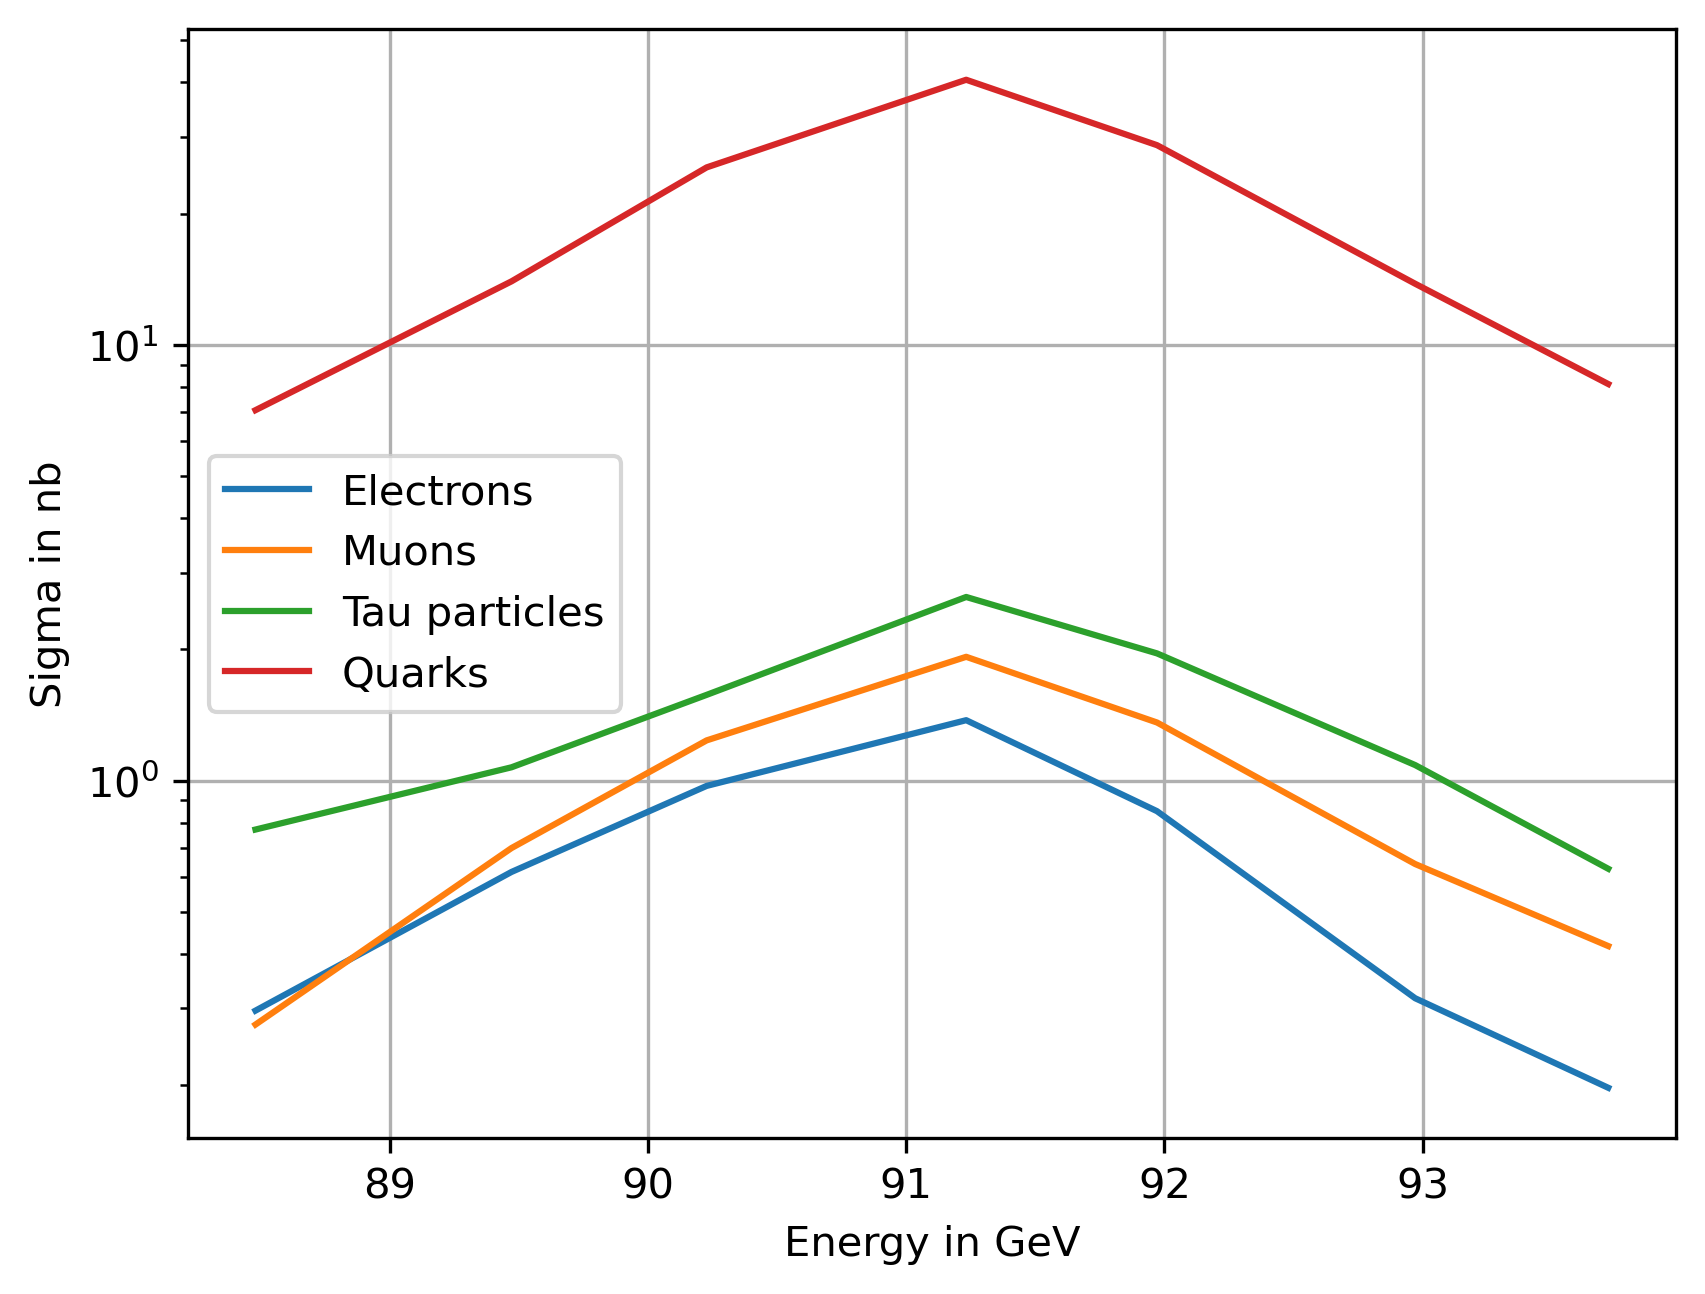

In [248]:
sigma_e = np.empty(7)
sigma_m = np.empty(7)
sigma_t = np.empty(7)
sigma_q = np.empty(7)
for i in range(7):
    sigma_e[i] = N_init[0,i]/LEP_luminosities[1][i] + radcorr_lep[i]
print(sigma_e)
for i in range(7):
    sigma_m[i] = N_init[1,i]/LEP_luminosities[1][i] + radcorr_lep[i]
print(sigma_m)
for i in range(7):
    sigma_t[i] = N_init[2,i]/LEP_luminosities[1][i] + radcorr_lep[i]
print(sigma_t)
for i in range(7):
    sigma_q[i] = N_init[3,i]/LEP_luminosities[1][i] + radcorr_had[i]
print(sigma_q)

fig,ax = plt.subplots(dpi=300)
ax.plot(LEP_energies[1], sigma_e, label='Electrons')
ax.plot(LEP_energies[1], sigma_m, label='Muons')
ax.plot(LEP_energies[1], sigma_t, label='Tau particles')
ax.plot(LEP_energies[1], sigma_q, label='Quarks')

plt.semilogy()
ax.set_xlabel('Energy in GeV')
ax.set_ylabel('Sigma in nb')
ax.legend()
ax.grid()


## Part 3.4 - Fit a Breit-Wigner function to the cross sections

Once the cross sections have been calculated, the physical quantities of the Z0-boson can be retrieved by fitting the expected Breit-Wigner cross section to the data:

$$\frac{a}{\frac{4 (x-b)^2}{c^2} + \left(\frac{x}{b}\right)^2}$$

### Questions

1. What physical characteristic of the Z0 does each of the free parameters, $a$, $b$ and $c$ correspond to?

a:  propto peak cross section
b ~ m_Z0
c ~ Gamma_Z


### Exercises

3.4.1. Fit a Breit-Wigner function to each of the channels.

3.4.2. Plot the measured data (as in 3.3.2) together with the fitted function. Present the error in the fit function as a shaded area.

(The cells of 2.2. may be useful examples here :D)

In [249]:
def BreitWigner(x,a,b,c):
    return(a/(4./(c**2) * ((x - [b])**2) + (x/[b])**2))

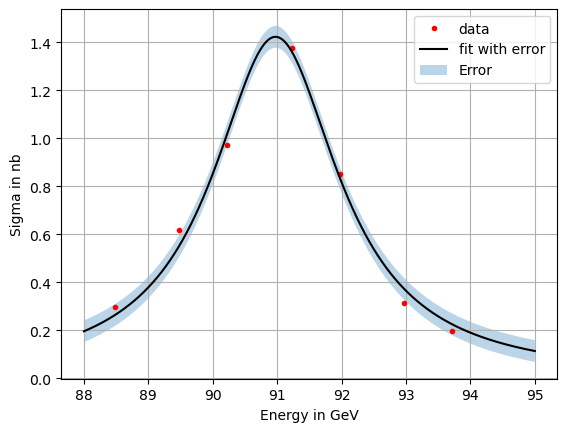

In [311]:
# fit example
e_lin = np.linspace(88,95,10000)
popt, pcov = curve_fit(BreitWigner, energies, sigma_e)

fig,ax=plt.subplots()
ax.plot(energies,sigma_e,'.',color="red",label="data")
ax.plot(e_lin,BreitWigner(e_lin,*popt),color="black",label="fit with error")
plt.fill_between(e_lin, BreitWigner(e_lin,*popt)-np.sqrt(pcov[1,1]), BreitWigner(e_lin,*popt)+np.sqrt(pcov[1,1]), alpha=0.3, label='Error')
ax.set_xlabel('Energy in GeV')
ax.set_ylabel('Sigma in nb')
ax.legend()
ax.grid()

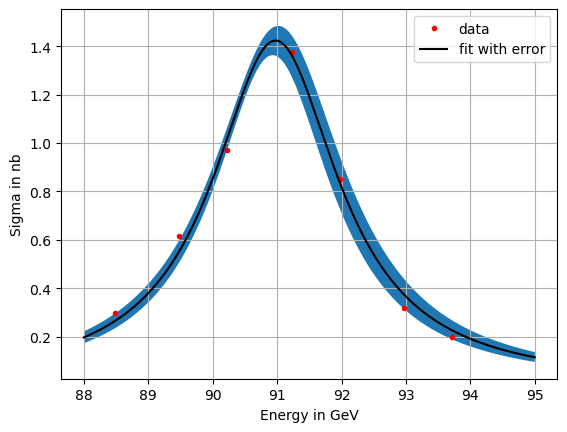

In [312]:

e_lin = np.linspace(88,95,10000)
popt, pcov = curve_fit(BreitWigner, energies, sigma_e)

fig,ax=plt.subplots()
ax.plot(energies,sigma_e,'.',color="red",label="data")
ax.plot(e_lin,BreitWigner(e_lin,*popt),color="black",label="fit with error")
y1 = BreitWigner(e_lin, popt[0]- pcov[0,0]**0.5, popt[1] - pcov[1,1]**0.5, popt[2] - pcov[2,2]**0.5)
y2 = BreitWigner(e_lin, popt[0]+ pcov[0,0]**0.5, popt[1] + pcov[1,1]**0.5, popt[2] + pcov[2,2]**0.5)
plt.fill_between(e_lin, y1,y2)
ax.set_xlabel('Energy in GeV')
ax.set_ylabel('Sigma in nb')
ax.legend()
ax.grid()

## Part 3.5 - Calculate errors in the cross section data

In the previous part, the fit was done disregarding statistical uncertainties in the measured data. This means that different poins are considered equally into the fit, even tough they shouldn't. In this section we present the calculation of the errors in $\Delta \sigma_{i,k}$.

In order to calculate the final $\Delta \sigma_{i,k}$, we first need to evaluate the statistical uncertainties in each of the terms, i.e., $\Delta L_{k}$, $\Delta N^{j,k}_{\rm{det}}$ and $\Delta A_{i,j}^{-1}$.

*Luminosity*

The uncertainties in the luminosity, $\Delta L_{k}$ were given above.

In [252]:
LEP_luminosities_error[1] = np.array([3.502185,3.179205,2.810879,7.786547,3.567344,3.121618,3.972102])
LEP_luminosities_error[1]

array([3.502185, 3.179205, 2.810879, 7.786547, 3.567344, 3.121618,
       3.972102])

*Number of measured events*

The uncertainties in the measured events is purely Poissonian, therefore: $\Delta N_{\rm{det}}^{j,k} = \sqrt{N_{\rm{det}}^{j,k}}$

In [255]:
N_det_test = np.array([[139,131,368,3079],
                 [221,252,403,4720],
                 [250,333,443,6711],
                 [2622,3998,5652,83327],
                 [398,666,946,13778],
                 [156,289,440,6020],
                 [209,346,466,6691]])
N_det = N_det_test.T
print(N_det)
N_det_error = np.sqrt(N_det)
N_det_error

[[  139   221   250  2622   398   156   209]
 [  131   252   333  3998   666   289   346]
 [  368   403   443  5652   946   440   466]
 [ 3079  4720  6711 83327 13778  6020  6691]]


array([[ 11.78982612,  14.86606875,  15.8113883 ,  51.20546846,
         19.94993734,  12.489996  ,  14.45683229],
       [ 11.44552314,  15.87450787,  18.24828759,  63.22973984,
         25.8069758 ,  17.        ,  18.60107524],
       [ 19.18332609,  20.0748599 ,  21.04756518,  75.17978452,
         30.757113  ,  20.97617696,  21.58703314],
       [ 55.4887376 ,  68.70225615,  81.92069336, 288.66416473,
        117.37972568,  77.58865897,  81.79853299]])

*Acceptance matrix*

The uncertainties in the acceptance matrix are $\Delta A_{i,j} = \sqrt{A_{i,j} (1-A_{i,j})/10^5}$

In [256]:
AcceptanceMatrix = np.array([[0.939,0.0,0.01729,0.0],[0.0,0.821,0.061,0.0],[0.079,0.124,0.741,0.0],[0.0,0.0,0.003,0.897]]) # corrected after s-t separation (e,m,t,q)
A = AcceptanceMatrix
A_error = np.sqrt(AcceptanceMatrix*(1-AcceptanceMatrix)/1e5)
print(A_error)

[[0.00075683 0.         0.0004122  0.        ]
 [0.         0.00121227 0.00075683 0.        ]
 [0.00085299 0.00104223 0.00138535 0.        ]
 [0.         0.         0.00017295 0.0009612 ]]


*Inverted acceptance matrix*

The uncertainties in the INVERTED acceptance matrix are $\Delta A^{-1} = A^{-1} \Delta A A^{-1}$

In [257]:
A_inv_error = A_inv * A_error * A_inv
A_inv_error

array([[8.61776851e-04, 0.00000000e+00, 2.62016165e-07, 0.00000000e+00],
       [0.00000000e+00, 1.84416812e-03, 7.83303682e-06, 0.00000000e+00],
       [1.13194535e-05, 4.45737375e-05, 2.59727589e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.62681105e-09, 1.19462045e-03]])

Finally, via error propagation:

$\sigma_{i,k} = \frac{\Sigma_j A_{i,j}^{-1} N_{\rm{det}}^{j,k}}{L_{k}}$

$\implies \Delta \sigma_{i,k} = \sqrt{\Sigma_j \left(\Delta A^{-1}_{i,j} \frac{N_{\rm{det}}^{j,k}}{L_{k}}\right)^2 + \Sigma_j \left( \Delta N_{\rm{det}}^{j,k} \frac{A^{-1}_{i,j}}{L_{k}} \right)^2 + \Sigma_j \left( \Delta L_k \frac{A^{-1}_{i,j} N_{\rm{det}}^{j,k}}{L^2_k}\right)^2 }$

In [295]:
sigma_error = np.zeros((4,7))
for i in range(4):
    for k in range(7):
        summe = 0
        for j in range(4):
            A = (A_inv_error[i,j]*(N_det)[j,k]/LEP_luminosities[1][k])**2
            N =((N_det_error)[j,k]*A_inv[i,j]/LEP_luminosities[1][k])**2
            L = (LEP_luminosities_error[1][k]*A_inv[i,j]*(N_det)[j,k]/LEP_luminosities[1][k]**2)**2
            summe += A + N + L
        sigma_error[i,k] = summe**0.5
print(sigma_error)

[[0.01866395 0.02930794 0.04044145 0.01766856 0.03350373 0.02792628
  0.02018777]
 [0.02112774 0.03637933 0.05428196 0.02551928 0.05054098 0.0442627
  0.03020649]
 [0.0392899  0.05140352 0.07011084 0.0341899  0.06751619 0.06105763
  0.03920372]
 [0.0953924  0.15218954 0.24887992 0.13094356 0.24577109 0.20278665
  0.12957257]]


### Exercises

3.5.1. Calculate the statistical uncertainties on the cross sections for each energy and channel.

3.5.2. Plot the cross section showing the statistical uncertainties.

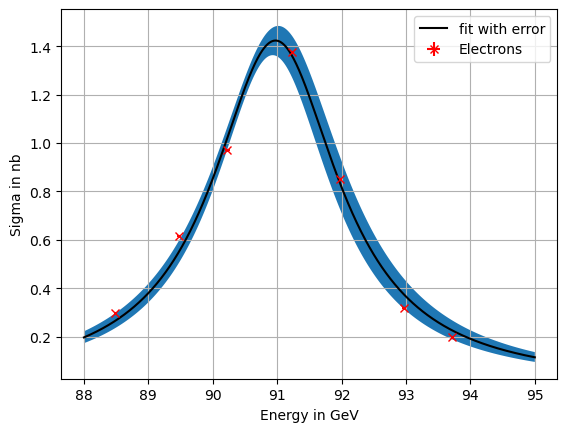

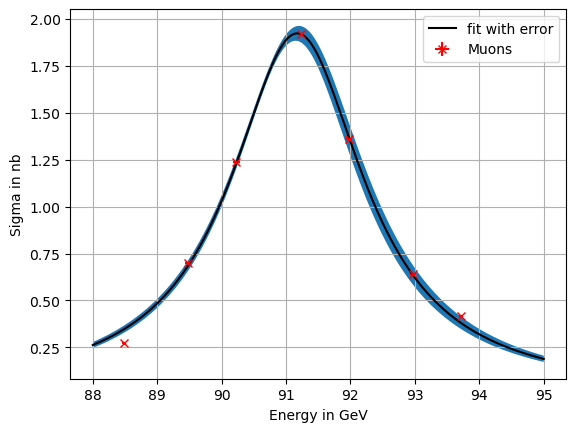

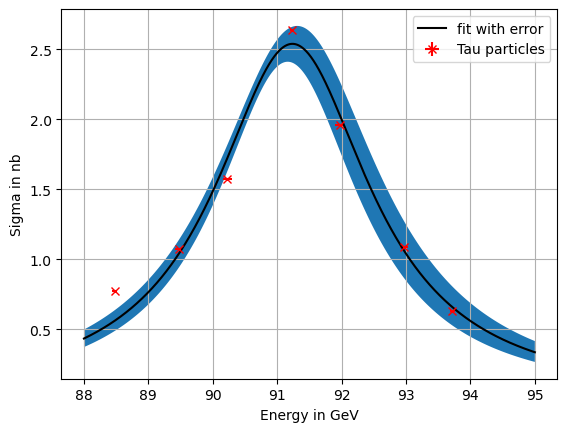

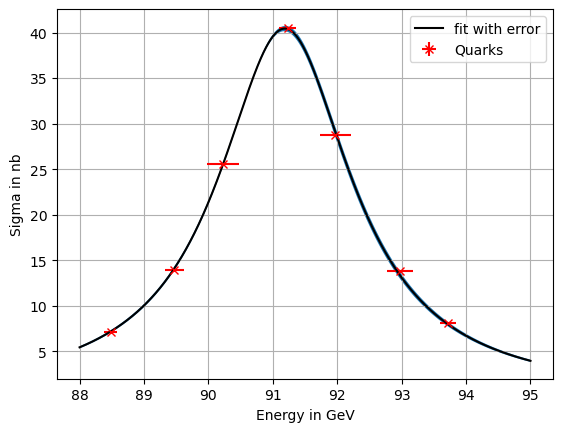

In [315]:
#Electron
e_lin = np.linspace(88,95,10000)
popt, pcov = curve_fit(BreitWigner, energies, sigma_e)
popte=popt
pcove=pcov
fig,ax=plt.subplots()
#ax.plot(energies,sigma_e,'.',color="red",label="data")
ax.errorbar(energies,sigma_e,0,sigma_error[0,:],'x',color="red",label='Electrons')
ax.plot(e_lin,BreitWigner(e_lin,*popt),color="black",label="fit with error")
y1 = BreitWigner(e_lin, popt[0]- pcov[0,0]**0.5, popt[1] - pcov[1,1]**0.5, popt[2] - pcov[2,2]**0.5)
y2 = BreitWigner(e_lin, popt[0]+ pcov[0,0]**0.5, popt[1] + pcov[1,1]**0.5, popt[2] + pcov[2,2]**0.5)
plt.fill_between(e_lin, y1,y2)
ax.set_xlabel('Energy in GeV')
ax.set_ylabel('Sigma in nb')
ax.legend()
ax.grid()

#Muon
popt, pcov = curve_fit(BreitWigner, energies, sigma_m,p0=[*popt])
poptm=popt
pcovm=pcov
fig,ax=plt.subplots()
#ax.plot(energies,sigma_e,'.',color="red",label="data")
ax.errorbar(energies,sigma_m,0,sigma_error[1,:],'x',color="red", label='Muons')
ax.plot(e_lin,BreitWigner(e_lin,*popt),color="black",label="fit with error")
y1 = BreitWigner(e_lin, popt[0]- pcov[0,0]**0.5, popt[1] - pcov[1,1]**0.5, popt[2] - pcov[2,2]**0.5)
y2 = BreitWigner(e_lin, popt[0]+ pcov[0,0]**0.5, popt[1] + pcov[1,1]**0.5, popt[2] + pcov[2,2]**0.5)
plt.fill_between(e_lin, y1,y2)
ax.set_xlabel('Energy in GeV')
ax.set_ylabel('Sigma in nb')
ax.legend()
ax.grid()

#Tau
popt, pcov = curve_fit(BreitWigner, energies, sigma_t,p0=[*popt])
poptt=popt
pcovt=pcov
fig,ax=plt.subplots()
#ax.plot(energies,sigma_e,'.',color="red",label="data")
ax.errorbar(energies,sigma_t,0,sigma_error[2,:],'x',color="red", label='Tau particles')
ax.plot(e_lin,BreitWigner(e_lin,*popt),color="black",label="fit with error")
y1 = BreitWigner(e_lin, popt[0]- pcov[0,0]**0.5, popt[1] - pcov[1,1]**0.5, popt[2] - pcov[2,2]**0.5)
y2 = BreitWigner(e_lin, popt[0]+ pcov[0,0]**0.5, popt[1] + pcov[1,1]**0.5, popt[2] + pcov[2,2]**0.5)
plt.fill_between(e_lin, y1,y2)
ax.set_xlabel('Energy in GeV')
ax.set_ylabel('Sigma in nb')
ax.legend()
ax.grid()

popt, pcov = curve_fit(BreitWigner, energies, sigma_q)
poptq=popt
pcovq=pcov
fig,ax=plt.subplots()
#ax.plot(energies,sigma_e,'.',color="red",label="data")
ax.errorbar(energies,sigma_q,0,sigma_error[3,:],'x',color="red", label='Quarks')
ax.plot(e_lin,BreitWigner(e_lin,*popt),color="black",label="fit with error")
y1 = BreitWigner(e_lin, popt[0]- pcov[0,0]**0.5, popt[1] - pcov[1,1]**0.5, popt[2] - pcov[2,2]**0.5)
y2 = BreitWigner(e_lin, popt[0]+ pcov[0,0]**0.5, popt[1] + pcov[1,1]**0.5, popt[2] + pcov[2,2]**0.5)
plt.fill_between(e_lin, y1,y2)
ax.set_xlabel('Energy in GeV')
ax.set_ylabel('Sigma in nb')
ax.legend()
ax.grid()

## Part 3.6 - Fit of the data considering errors

Finally, we can now fit the data considering the errors in the data, as it should be.

### Exercises

3.6.1. Refit the data, now considering the statistical uncertainties.

3.6.2. Plot the data with errors and the fitted functions.

3.6.3. Calculate the $\chi^2/\rm{NDF}$ for each channel.

In [ ]:
defBreitwigpeakmodel=12*np.pi/Mz**2*Gammae*Gammaf/GammaZ**2

In [335]:
# Calculate the chi-squared statistic and p-value
chi2_state = 1/(7-3)*(sigma_e-BreitWigner(energies,*popte))**2/sigma_error[0,:]**2
print(chi2_state)
chi2_statm = 1/(7-3)*(sigma_m-BreitWigner(energies,*poptm))**2/sigma_error[1,:]**2
print(chi2_statm)
chi2_statt = 1/(7-3)*(sigma_t-BreitWigner(energies,*poptt))**2/sigma_error[2,:]**2
print(chi2_statt)
chi2_statq = 1/(7-3)*(sigma_q-BreitWigner(energies,*poptq))**2/sigma_error[3,:]**2
print(chi2_statq)

print(poptm)

[0.74137616 1.32968611 0.38039896 0.19990829 0.0419537  1.03677164
 0.49090989]
[2.77585199e+00 6.11706440e-02 2.34798221e-03 3.14562231e-03
 2.09336943e-02 1.05300969e-02 3.97507266e-01]
[7.18805792 0.1097582  1.17040945 2.06602483 0.29175273 0.04260741
 0.1531202 ]
[0.18398904 0.18709274 0.00113609 0.37162901 0.53959206 1.10064261
 0.35246374]
[ 1.92339331 91.19044731  2.5217855 ]


### Questions

1. What does the $\chi^2/\rm{NDF}$ mean?
Specifically:

    $\chi^2$ (chi-squared) is a statistic that quantifies the difference between the observed data and the values predicted by the model/curve being fit. A lower $\chi^2$ indicates a better fit.
    NDF stands for "number of degrees of freedom", which is the number of data points minus the number of fitted parameters in the model.

The ratio $\chi^2/\mathrm{NDF}$ provides a normalized value that allows comparison of fits with different numbers of data points and parameters.
2. What range of $\chi^2/\rm{NDF}$ denotes a good fit? What happens outside of this range?
A $\chi^2/\mathrm{NDF}$ value close to 1 is generally considered a good fit, indicating that the model describes the data well within the uncertainties. Specifically:

$\chi^2/\mathrm{NDF} \approx 1$ means the fit function accurately models the data fluctuations.
$\chi^2/\mathrm{NDF} > 1$ suggests the model does not describe the data well, possibly due to underestimated uncertainties, an incorrect model, or other sources of error not accounted for.
$\chi^2/\mathrm{NDF} < 1$ may indicate overestimated uncertainties or an overly complex model with too many free parameters.

3. How good was the fit you just got?
Very good

In [21]:
# Example to run the fit with errors

popt, pcov = curve_fit(BreitWigner, energies, crosssection, sigma=delta_crosssection,absolute_sigma=True)

NameError: name 'crosssection' is not defined